In [4]:
#! pip install statsmodels
import statsmodels.api as sm
import pandas as pd 
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from scipy.stats import linregress
plt.style.use('ggplot')

In [5]:
base_90 = {'code' : ["ZAF", "ALB", "DZA", "DEU", "SAU", "ARG", "ARM", "AUS", "AUT", "BHR", "BGD", "BEL", "BEN", "BOL", "BWA", "BRA", "BGR", "BDI", "KHM", "CMR", "CAN", "CAF", "CHL", "CHN", "CYP", "COL", "COG", "COD", "KOR", "CRI", "CIV", "HRV", "CUB", "DNK", "DOM", "EGY", "ARE", "ECU", "ESP", "EST", "SWZ", "USA", "FIN", "FRA", "GAB", "GMB", "GHA", "GRC", "GTM", "GIN", "GUY", "HTI", "HND", "HUN", "IND", "IDN", "IRQ", "IRN", "IRL", "ISL", "ISR", "ITA", "JAM", "JPN", "JOR", "KAZ", "KEN", "KGZ", "LAO", "LSO", "LVA", "LBY", "LTU", "LUX", "MYS", "MWI", "MLI", "MAR", "MUS", "MRT", "MEX", "MDA", "MNG", "MOZ", "MMR", "NAM", "NPL", "NIC", "NER", "NOR", "NZL", "UGA", "PAK", "PAN", "PNG", "PRY", "NLD", "PER", "PHL", "POL", "PRT", "QAT", "ROM", "GBR", "RUS", "RWA", "SLV", "SEN", "YUG", "SLE", "SGP", "SVK", "SVN", "SDN", "LKA", "SWE", "CHE", "TJK", "TZA", "CZE", "THA", "TGO", "TTO", "TUN", "TUR", "UKR", "URY", "VEN", "VNM", "YEM", "ZMB", "ZWE"],'nom' : ["Afrique du Sud", "Albanie", "Algérie", "Allemagne", "Arabie Saoudite", "Argentine", "Arménie", "Australie", "Autriche", "Bahreïn", "Bangladesh", "Belgique", "Bénin ", "Bolivie", "Botswana", "Brésil", "Bulgarie", "Burundi", "Cambodge", "Cameroun", "Canada", "Centrafricaine (rep)", "Chili", "Chine", "Chypre", "Colombie", "Congo", "Congo (rep. dem.)", "Corée du Sud", "Costa Rica", "Côte d'Ivoire", "Croatie", "Cuba", "Danemark", "Dominicaine (Rep)", "Égypte", "Émirats arabes unis", "Équateur", "Espagne", "Estonie", "Eswatini", "États-Unis", "Finlande", "France", "Gabon", "Gambie", "Ghana", "Grèce", "Guatemala", "Guinée", "Guyana", "Haïti", "Honduras", "Hongrie", "Inde", "Indonésie", "Irak", "Iran", "Irlande", "Islande", "Israël", "Italie", "Jamaïque", "Japon", "Jordanie", "Kazakhstan", "Kenya", "Kirghizstan", "Laos", "Lesotho", "Lettonie", "Libye", "Lituanie", "Luxembourg", "Malaisie", "Malawi", "Mali", "Maroc", "Maurice", "Mauritanie", "Mexique", "Moldavie", "Mongolie", "Mozambique", "Myanmar", "Namibie", "Népal", "Nicaragua", "Niger", "Norvège", "Nouvelle-Zélande", "Ouganda", "Pakistan", "Panama", "Papouasie-Nouvelle-G.", "Paraguay", "Pays-Bas", "Pérou", "Philippines", "Pologne", "Portugal", "Qatar", "Roumanie", "Royaume-Uni", "Russie", "Rwanda", "Salvador", "Sénégal", "Serbie", "Sierra Leone", "Singapour", "Slovaquie", "Slovénie", "Soudan", "Sri Lanka", "Suède", "Suisse", "Tadjikistan", "Tanzanie", "Tchèque (Rép)", "Thaïlande", "Togo", "Trinité-et-Tobago", "Tunisie", "Turquie", "Ukraine", "Uruguay", "Venezuela", "Vietnam", "Yémen", "Zambie", "Zimbabwe"],'IDH' : ["0.618", "0.645", "0.577", "0.801", "0.697", "0.704", "0.631", "0.866", "0.795", "0.746", "0.387", "0.806", "0.348", "0.536", "0.581", "0.611", "0.694", "0.297", "0.364", "0.44", "0.849", "0.317", "0.701", "0.502", "0.732", "0.592", "0.536", "0.356", "0.728", "0.656", "0.388", "0.67", "0.676", "0.799", "0.598", "0.546", "0.727", "0.643", "0.754", "0.733", "0.536", "0.86", "0.784", "0.779", "0.62", "0.333", "0.455", "0.753", "0.478", "0.276", "0.538", "0.409", "0.506", "0.704", "0.427", "0.528", "0.572", "0.577", "0.763", "0.802", "0.792", "0.769", "0.638", "0.816", "0.617", "0.69", "0.468", "0.618", "0.4", "0.499", "0.704", "0.677", "0.732", "0.782", "0.643", "0.34", "0.231", "0.458", "0.619", "0.374", "0.65", "0.651", "0.579", "0.209", "0.359", "0.579", "0.378", "0.489", "0.21", "0.85", "0.818", "0.311", "0.404", "0.66", "0.38", "0.58", "0.829", "0.611", "0.586", "0.712", "0.711", "0.754", "0.701", "0.775", "0.734", "0.25", "0.529", "0.367", "0.718", "0.275", "0.718", "0.739", "0.767", "0.331", "0.625", "0.816", "0.832", "0.623", "0.37", "0.73", "0.574", "0.405", "0.672", "0.569", "0.579", "0.705", "0.692", "0.634", "0.475", "0.399", "0.401", "0.491"]}
base_95 = {'code' : ["ZAF", "ALB", "DZA", "DEU", "SAU", "ARG", "ARM", "AUS", "AUT", "AZE", "BHR", "BGD", "BLR", "BEL", "BEN", "BOL", "BWA", "BRA", "BGR", "BDI", "KHM", "CMR", "CAN", "CAF", "CHL", "CHN", "CYP", "COL", "COG", "COD", "KOR", "CRI", "CIV", "HRV", "CUB", "DNK", "DJI", "DOM", "EGY", "ARE", "ECU", "ESP", "EST", "SWZ", "USA", "FIN", "FRA", "GAB", "GMB", "GHA", "GRC", "GTM", "GIN", "GUY", "HTI", "HND", "HUN", "IND", "IDN", "IRQ", "IRN", "IRL", "ISL", "ISR", "ITA", "JAM", "JPN", "JOR", "KAZ", "KEN", "KGZ", "LAO", "LSO", "LVA", "LBY", "LTU", "LUX", "MYS", "MWI", "MLI", "MAR", "MUS", "MRT", "MEX", "MDA", "MNG", "MOZ", "MMR", "NAM", "NPL", "NIC", "NER", "NOR", "NZL", "UGA", "PAK", "PAN", "PNG", "PRY", "NLD", "PER", "PHL", "POL", "PRT", "QAT", "ROM", "GBR", "RUS", "RWA", "SLV", "SEN", "YUG", "SLE", "SGP", "SVK", "SVN", "SDN", "LKA", "SWE", "CHE", "SYR", "TJK", "TZA", "CZE", "THA", "TGO", "TTO", "TUN", "TUR", "UKR", "URY", "VEN", "VNM", "YEM", "ZMB", "ZWE"],'nom' : ["Afrique du Sud", "Albanie", "Algérie", "Allemagne", "Arabie Saoudite", "Argentine", "Arménie", "Australie", "Autriche", "Azerbaïdjan", "Bahreïn", "Bangladesh", "Belarus", "Belgique", "Bénin ", "Bolivie", "Botswana", "Brésil", "Bulgarie", "Burundi", "Cambodge", "Cameroun", "Canada", "Centrafricaine (rep)", "Chili", "Chine", "Chypre", "Colombie", "Congo", "Congo (rep. dem.)", "Corée du Sud", "Costa Rica", "Côte d'Ivoire", "Croatie", "Cuba", "Danemark", "Djibouti", "Dominicaine (Rep)", "Égypte", "Émirats arabes unis", "Équateur", "Espagne", "Estonie", "Eswatini", "États-Unis", "Finlande", "France", "Gabon", "Gambie", "Ghana", "Grèce", "Guatemala", "Guinée", "Guyana", "Haïti", "Honduras", "Hongrie", "Inde", "Indonésie", "Irak", "Iran", "Irlande", "Islande", "Israël", "Italie", "Jamaïque", "Japon", "Jordanie", "Kazakhstan", "Kenya", "Kirghizstan", "Laos", "Lesotho", "Lettonie", "Libye", "Lituanie", "Luxembourg", "Malaisie", "Malawi", "Mali", "Maroc", "Maurice", "Mauritanie", "Mexique", "Moldavie", "Mongolie", "Mozambique", "Myanmar", "Namibie", "Népal", "Nicaragua", "Niger", "Norvège", "Nouvelle-Zélande", "Ouganda", "Pakistan", "Panama", "Papouasie-Nouvelle-G.", "Paraguay", "Pays-Bas", "Pérou", "Philippines", "Pologne", "Portugal", "Qatar", "Roumanie", "Royaume-Uni", "Russie", "Rwanda", "Salvador", "Sénégal", "Serbie", "Sierra Leone", "Singapour", "Slovaquie", "Slovénie", "Soudan", "Sri Lanka", "Suède", "Suisse", "Syrie", "Tadjikistan", "Tanzanie", "Tchèque (Rép)", "Thaïlande", "Togo", "Trinité-et-Tobago", "Tunisie", "Turquie", "Ukraine", "Uruguay", "Venezuela", "Vietnam", "Yémen", "Zambie", "Zimbabwe"],'IDH' : ["0.649", "0.632", "0.6", "0.834", "0.722", "0.731", "0.605", "0.883", "0.817", "0.612", "0.775", "0.425", "0.657", "0.852", "0.373", "0.571", "0.577", "0.648", "0.696", "0.296", "0.387", "0.422", "0.861", "0.303", "0.727", "0.55", "0.786", "0.625", "0.507", "0.333", "0.778", "0.687", "0.387", "0.696", "0.654", "0.831", "0.355", "0.629", "0.576", "0.764", "0.662", "0.8", "0.727", "0.52", "0.877", "0.816", "0.825", "0.632", "0.353", "0.473", "0.768", "0.507", "0.295", "0.578", "0.418", "0.529", "0.741", "0.46", "0.564", "0.553", "0.64", "0.795", "0.826", "0.823", "0.8", "0.657", "0.84", "0.684", "0.664", "0.456", "0.563", "0.428", "0.492", "0.673", "0.704", "0.703", "0.808", "0.683", "0.398", "0.262", "0.489", "0.648", "0.418", "0.669", "0.594", "0.555", "0.229", "0.398", "0.588", "0.41", "0.524", "0.229", "0.883", "0.851", "0.321", "0.428", "0.688", "0.425", "0.606", "0.861", "0.643", "0.598", "0.74", "0.76", "0.784", "0.687", "0.839", "0.7", "0.234", "0.577", "0.368", "0.695", "0.274", "0.773", "0.751", "0.782", "0.366", "0.65", "0.856", "0.848", "0.579", "0.55", "0.371", "0.753", "0.611", "0.409", "0.683", "0.607", "0.607", "0.664", "0.711", "0.658", "0.529", "0.415", "0.412", "0.467"]}
base_00 = {'code' : ["ZAF", "ALB", "DZA", "DEU", "AGO", "SAU", "ARG", "ARM", "AUS", "AUT", "AZE", "BHR", "BGD", "BLR", "BEL", "BEN", "BOL", "BIH", "BWA", "BRA", "BGR", "BFA", "BDI", "KHM", "CMR", "CAN", "CPV", "CAF", "CHL", "CHN", "CYP", "COL", "COG", "COD", "KOR", "CRI", "CIV", "HRV", "CUB", "DNK", "DJI", "DOM", "EGY", "ARE", "ECU", "ESP", "EST", "SWZ", "USA", "ETH", "FIN", "FRA", "GAB", "GMB", "GEO", "GHA", "GRC", "GTM", "GIN", "GNQ", "GUY", "HTI", "HND", "HUN", "IND", "IDN", "IRQ", "IRN", "IRL", "ISL", "ISR", "ITA", "JAM", "JPN", "JOR", "KAZ", "KEN", "KGZ", "LAO", "LSO", "LVA", "LBR", "LBY", "LTU", "LUX", "MKD", "MDG", "MYS", "MWI", "MLI", "MAR", "MUS", "MRT", "MEX", "MDA", "MNG", "MOZ", "MMR", "NAM", "NPL", "NIC", "NER", "NOR", "NZL", "OMN", "UGA", "UZB", "PAK", "PAN", "PNG", "PRY", "NLD", "PER", "PHL", "POL", "PRT", "QAT", "ROM", "GBR", "RUS", "RWA", "SLV", "SEN", "YUG", "SLE", "SGP", "SVK", "SVN", "SDN", "LKA", "SWE", "CHE", "SYR", "TJK", "TZA", "TCD", "CZE", "THA", "TMP", "TGO", "TTO", "TUN", "TUR", "UKR", "URY", "VEN", "VNM", "YEM", "ZMB", "ZWE"],'nom' : ["Afrique du Sud", "Albanie", "Algérie", "Allemagne", "Angola", "Arabie Saoudite", "Argentine", "Arménie", "Australie", "Autriche", "Azerbaïdjan", "Bahreïn", "Bangladesh", "Belarus", "Belgique", "Bénin ", "Bolivie", "Bosnie-Herzégovine", "Botswana", "Brésil", "Bulgarie", "Burkina Faso", "Burundi", "Cambodge", "Cameroun", "Canada", "Cap-Vert", "Centrafricaine (rep)", "Chili", "Chine", "Chypre", "Colombie", "Congo", "Congo (rep. dem.)", "Corée du Sud", "Costa Rica", "Côte d'Ivoire", "Croatie", "Cuba", "Danemark", "Djibouti", "Dominicaine (Rep)", "Égypte", "Émirats arabes unis", "Équateur", "Espagne", "Estonie", "Eswatini", "États-Unis", "Éthiopie", "Finlande", "France", "Gabon", "Gambie", "Géorgie", "Ghana", "Grèce", "Guatemala", "Guinée", "Guinée équatoriale", "Guyana", "Haïti", "Honduras", "Hongrie", "Inde", "Indonésie", "Irak", "Iran", "Irlande", "Islande", "Israël", "Italie", "Jamaïque", "Japon", "Jordanie", "Kazakhstan", "Kenya", "Kirghizstan", "Laos", "Lesotho", "Lettonie", "Liberia", "Libye", "Lituanie", "Luxembourg", "Macédoine du Nord", "Madagascar", "Malaisie", "Malawi", "Mali", "Maroc", "Maurice", "Mauritanie", "Mexique", "Moldavie", "Mongolie", "Mozambique", "Myanmar", "Namibie", "Népal", "Nicaragua", "Niger", "Norvège", "Nouvelle-Zélande", "Oman", "Ouganda", "Ouzbékistan", "Pakistan", "Panama", "Papouasie-Nouvelle-G.", "Paraguay", "Pays-Bas", "Pérou", "Philippines", "Pologne", "Portugal", "Qatar", "Roumanie", "Royaume-Uni", "Russie", "Rwanda", "Salvador", "Sénégal", "Serbie", "Sierra Leone", "Singapour", "Slovaquie", "Slovénie", "Soudan", "Sri Lanka", "Suède", "Suisse", "Syrie", "Tadjikistan", "Tanzanie", "Tchad", "Tchèque (Rép)", "Thaïlande", "Timor oriental", "Togo", "Trinité-et-Tobago", "Tunisie", "Turquie", "Ukraine", "Uruguay", "Venezuela", "Vietnam", "Yémen", "Zambie", "Zimbabwe"],'IDH' : ["0.63", "0.669", "0.644", "0.868", "0.387", "0.743", "0.771", "0.647", "0.898", "0.838", "0.64", "0.792", "0.468", "0.683", "0.873", "0.398", "0.608", "0.672", "0.565", "0.684", "0.712", "0.286", "0.303", "0.42", "0.431", "0.867", "0.57", "0.309", "0.759", "0.594", "0.802", "0.653", "0.49", "0.333", "0.817", "0.711", "0.394", "0.75", "0.686", "0.863", "0.363", "0.657", "0.611", "0.798", "0.67", "0.825", "0.78", "0.471", "0.885", "0.283", "0.858", "0.849", "0.633", "0.385", "0.673", "0.484", "0.796", "0.546", "0.329", "0.516", "0.604", "0.442", "0.554", "0.769", "0.493", "0.606", "0.607", "0.67", "0.857", "0.86", "0.853", "0.83", "0.662", "0.855", "0.702", "0.685", "0.451", "0.594", "0.466", "0.467", "0.728", "0.387", "0.727", "0.756", "0.855", "0.669", "0.456", "0.725", "0.399", "0.308", "0.53", "0.673", "0.442", "0.702", "0.597", "0.589", "0.298", "0.431", "0.558", "0.446", "0.57", "0.252", "0.917", "0.869", "0.704", "0.398", "0.595", "0.45", "0.719", "0.449", "0.624", "0.876", "0.678", "0.624", "0.785", "0.785", "0.81", "0.709", "0.867", "0.72", "0.335", "0.615", "0.38", "0.711", "0.284", "0.819", "0.764", "0.825", "0.402", "0.685", "0.897", "0.889", "0.59", "0.55", "0.395", "0.299", "0.796", "0.649", "0.507", "0.425", "0.716", "0.653", "0.655", "0.671", "0.742", "0.672", "0.579", "0.443", "0.432", "0.44"]}
base_05 = {'code' : ["AFG", "ZAF", "ALB", "DZA", "DEU", "AGO", "SAU", "ARG", "ARM", "AUS", "AUT", "AZE", "BHR", "BGD", "BLR", "BEL", "BEN", "BTN", "BOL", "BIH", "BWA", "BRA", "BGR", "BFA", "BDI", "KHM", "CMR", "CAN", "CPV", "CAF", "CHL", "CHN", "CYP", "COL", "COM", "COG", "COD", "KOR", "CRI", "CIV", "HRV", "CUB", "DNK", "DJI", "DOM", "EGY", "ARE", "ECU", "ERI", "ESP", "EST", "SWZ", "USA", "ETH", "FIN", "FRA", "GAB", "GMB", "GEO", "GHA", "GRC", "GTM", "GIN", "GNQ", "GNB", "GUY", "HTI", "HND", "HUN", "IND", "IDN", "IRQ", "IRN", "IRL", "ISL", "ISR", "ITA", "JAM", "JPN", "JOR", "KAZ", "KEN", "KGZ", "LAO", "LSO", "LVA", "LBN", "LBR", "LBY", "LTU", "LUX", "MKD", "MDG", "MYS", "MWI", "MLI", "MAR", "MUS", "MRT", "MEX", "MDA", "MNG", "MON", "MOZ", "MMR", "NAM", "NPL", "NIC", "NER", "NGA", "NOR", "NZL", "OMN", "UGA", "UZB", "PAK", "PAN", "PNG", "PRY", "NLD", "PER", "PHL", "POL", "PRT", "QAT", "ROM", "GBR", "RUS", "RWA", "SLV", "SEN", "YUG", "SLE", "SGP", "SVK", "SVN", "SDN", "LKA", "SWE", "CHE", "SUR", "SYR", "TJK", "TZA", "TCD", "CZE", "THA", "TMP", "TGO", "TTO", "TUN", "TUR", "UKR", "URY", "VEN", "VNM", "YEM", "ZMB", "ZWE"],'nom' : ["Afghanistan", "Afrique du Sud", "Albanie", "Algérie", "Allemagne", "Angola", "Arabie Saoudite", "Argentine", "Arménie", "Australie", "Autriche", "Azerbaïdjan", "Bahreïn", "Bangladesh", "Belarus", "Belgique", "Bénin ", "Bhoutan", "Bolivie", "Bosnie-Herzégovine", "Botswana", "Brésil", "Bulgarie", "Burkina Faso", "Burundi", "Cambodge", "Cameroun", "Canada", "Cap-Vert", "Centrafricaine (rep)", "Chili", "Chine", "Chypre", "Colombie", "Comores(Les)", "Congo", "Congo (rep. dem.)", "Corée du Sud", "Costa Rica", "Côte d'Ivoire", "Croatie", "Cuba", "Danemark", "Djibouti", "Dominicaine (Rep)", "Égypte", "Émirats arabes unis", "Équateur", "Érythrée", "Espagne", "Estonie", "Eswatini", "États-Unis", "Éthiopie", "Finlande", "France", "Gabon", "Gambie", "Géorgie", "Ghana", "Grèce", "Guatemala", "Guinée", "Guinée équatoriale", "Guinée-Bissau", "Guyana", "Haïti", "Honduras", "Hongrie", "Inde", "Indonésie", "Irak", "Iran", "Irlande", "Islande", "Israël", "Italie", "Jamaïque", "Japon", "Jordanie", "Kazakhstan", "Kenya", "Kirghizstan", "Laos", "Lesotho", "Lettonie", "Liban", "Liberia", "Libye", "Lituanie", "Luxembourg", "Macédoine du Nord", "Madagascar", "Malaisie", "Malawi", "Mali", "Maroc", "Maurice", "Mauritanie", "Mexique", "Moldavie", "Mongolie", "Monténégro", "Mozambique", "Myanmar", "Namibie", "Népal", "Nicaragua", "Niger", "Nigeria", "Norvège", "Nouvelle-Zélande", "Oman", "Ouganda", "Ouzbékistan", "Pakistan", "Panama", "Papouasie-Nouvelle-G.", "Paraguay", "Pays-Bas", "Pérou", "Philippines", "Pologne", "Portugal", "Qatar", "Roumanie", "Royaume-Uni", "Russie", "Rwanda", "Salvador", "Sénégal", "Serbie", "Sierra Leone", "Singapour", "Slovaquie", "Slovénie", "Soudan", "Sri Lanka", "Suède", "Suisse", "Suriname", "Syrie", "Tadjikistan", "Tanzanie", "Tchad", "Tchèque (Rép)", "Thaïlande", "Timor oriental", "Togo", "Trinité-et-Tobago", "Tunisie", "Turquie", "Ukraine", "Uruguay", "Venezuela", "Vietnam", "Yémen", "Zambie", "Zimbabwe"],'IDH' : ["0.408", "0.614", "0.704", "0.692", "0.903", "0.455", "0.77", "0.782", "0.693", "0.908", "0.855", "0.679", "0.791", "0.505", "0.725", "0.889", "0.44", "0.51", "0.624", "0.7", "0.596", "0.7", "0.75", "0.324", "0.33", "0.49", "0.466", "0.892", "0.598", "0.319", "0.788", "0.647", "0.831", "0.683", "0.455", "0.5", "0.364", "0.855", "0.728", "0.413", "0.783", "0.731", "0.903", "0.405", "0.675", "0.634", "0.825", "0.693", "0.408", "0.844", "0.825", "0.48", "0.898", "0.346", "0.895", "0.869", "0.647", "0.416", "0.712", "0.509", "0.845", "0.571", "0.371", "0.567", "0.396", "0.614", "0.453", "0.58", "0.804", "0.535", "0.632", "0.631", "0.695", "0.896", "0.889", "0.872", "0.857", "0.695", "0.873", "0.729", "0.747", "0.49", "0.616", "0.506", "0.461", "0.802", "0.732", "0.378", "0.747", "0.809", "0.878", "0.702", "0.479", "0.731", "0.38", "0.363", "0.58", "0.713", "0.466", "0.728", "0.648", "0.65", "0.753", "0.357", "0.477", "0.556", "0.475", "0.596", "0.283", "0.465", "0.932", "0.888", "0.748", "0.437", "0.628", "0.5", "0.739", "0.479", "0.649", "0.891", "0.698", "0.65", "0.808", "0.8", "0.831", "0.755", "0.891", "0.752", "0.408", "0.651", "0.422", "0.742", "0.342", "0.868", "0.794", "0.861", "0.436", "0.718", "0.899", "0.905", "0.676", "0.635", "0.593", "0.448", "0.33", "0.835", "0.693", "0.496", "0.436", "0.752", "0.689", "0.69", "0.715", "0.756", "0.714", "0.616", "0.474", "0.48", "0.43"]}

IDH_90 = pd.DataFrame(base_90)
IDH_95 = pd.DataFrame(base_95)
IDH_00 = pd.DataFrame(base_00)
IDH_05 = pd.DataFrame(base_05)

In [6]:
base_90_ = {'code' : ["ZAF", "ALB", "DZA", "DEU", "AGO", "SAU", "ARG", "ARM", "AUS", "AUT", "AZE", "BHR", "BGD", "BLR", "BEL", "BEN", "BTN", "BOL", "BWA", "BRA", "BGR", "BFA", "BDI", "CMR", "CAN", "CPV", "CAF", "CHL", "CHN", "CYP", "COL", "COM", "COG", "COD", "KOR", "CRI", "CIV", "CUB", "DNK", "DOM", "EGY", "ARE", "ECU", "ESP", "SWZ", "USA", "ETH", "FIN", "FRA", "GAB", "GMB", "GEO", "GHA", "GRC", "GTM", "GIN", "GNQ", "GNB", "GUY", "HTI", "HND", "IND", "IDN", "IRQ", "IRN", "IRL", "ISL", "ISR", "ITA", "JAM", "JPN", "JOR", "KAZ", "KEN", "KGZ", "LAO", "LSO", "LBN", "LUX", "MKD", "MDG", "MYS", "MWI", "MLI", "MAR", "MUS", "MRT", "MEX", "MNG", "MOZ", "MMR", "NAM", "NPL", "NIC", "NER", "NGA", "NOR", "NZL", "OMN", "UGA", "UZB", "PAK", "PAN", "PNG", "PRY", "NLD", "PER", "PHL", "POL", "PRT", "ROM", "GBR", "RUS", "RWA", "SLV", "SEN", "SLE", "SGP", "SVN", "SDN", "LKA", "SWE", "CHE", "SUR", "SYR", "TJK", "TZA", "TCD", "CZE", "THA", "TGO", "TTO", "TUN", "TKM", "TUR", "UKR", "URY", "VEN", "VNM", "YEM", "ZMB", "ZWE"],'nom' : ["Afrique du Sud", "Albanie", "Algérie", "Allemagne", "Angola", "Arabie Saoudite", "Argentine", "Arménie", "Australie", "Autriche", "Azerbaïdjan", "Bahreïn", "Bangladesh", "Belarus", "Belgique", "Bénin ", "Bhoutan", "Bolivie", "Botswana", "Brésil", "Bulgarie", "Burkina Faso", "Burundi", "Cameroun", "Canada", "Cap-Vert", "Centrafricaine (rep)", "Chili", "Chine", "Chypre", "Colombie", "Comores(Les)", "Congo", "Congo (rep. dem.)", "Corée du Sud", "Costa Rica", "Côte d'Ivoire", "Cuba", "Danemark", "Dominicaine (Rep)", "Égypte", "Émirats arabes unis", "Équateur", "Espagne", "Eswatini", "États-Unis", "Éthiopie", "Finlande", "France", "Gabon", "Gambie", "Géorgie", "Ghana", "Grèce", "Guatemala", "Guinée", "Guinée équatoriale", "Guinée-Bissau", "Guyana", "Haïti", "Honduras", "Inde", "Indonésie", "Irak", "Iran", "Irlande", "Islande", "Israël", "Italie", "Jamaïque", "Japon", "Jordanie", "Kazakhstan", "Kenya", "Kirghizstan", "Laos", "Lesotho", "Liban", "Luxembourg", "Macédoine du Nord", "Madagascar", "Malaisie", "Malawi", "Mali", "Maroc", "Maurice", "Mauritanie", "Mexique", "Mongolie", "Mozambique", "Myanmar", "Namibie", "Népal", "Nicaragua", "Niger", "Nigeria", "Norvège", "Nouvelle-Zélande", "Oman", "Ouganda", "Ouzbékistan", "Pakistan", "Panama", "Papouasie-Nouvelle-G.", "Paraguay", "Pays-Bas", "Pérou", "Philippines", "Pologne", "Portugal", "Roumanie", "Royaume-Uni", "Russie", "Rwanda", "Salvador", "Sénégal", "Sierra Leone", "Singapour", "Slovénie", "Soudan", "Sri Lanka", "Suède", "Suisse", "Suriname", "Syrie", "Tadjikistan", "Tanzanie", "Tchad", "Tchèque (Rép)", "Thaïlande", "Togo", "Trinité-et-Tobago", "Tunisie", "Turkménistan", "Turquie", "Ukraine", "Uruguay", "Venezuela", "Vietnam", "Yémen", "Zambie", "Zimbabwe"],'PIB' : ["185160422891.73", "5279160805.7599", "80470629590.902", "2342139255489.1", "27672785901.198", "284225946006.84", "265817211205.31", "5839777093.9512", "629485671230.82", "240629049863.28", "20240091907.577", "9006118309.7132", "52833978753.318", "29452716336.868", "293456205020.66", "3958255490.5212", "417287990.10159", "11974420933.741", "5274313873.0868", "917211118074.91", "38630990310.869", "3042310107.504", "2385838991.8942", "15416689237.844", "877824201432.12", "313527702.86048", "1492780724.8764", "71788871549.583", "1027379269906.8", "9941392505.9974", "120488417460.91", "529042761.14912", "5627105374.1447", "29404734879.051", "401560542993.63", "18845898693.616", "22747083498.092", "52749217702.761", "202014449528", "19981325537.006", "115166183182.7", "127141173333.78", "43683854187.302", "737305660791.84", "1857308362.906", "9811054837000", "13224508680.37", "155975322164.06", "1661090955411.7", "8218372646.5867", "694740031.23116", "17028335676.156", "13167340442.708", "158313089124.38", "24741758600.277", "3528427807.3346", "173733398.0021", "652092046.81074", "1782661480.134", "11154318590.041", "8615404668.1517", "465242841651.6", "270259316976.43", "62001516291.881", "187662435784.18", "81120842271.689", "8044378650.3189", "96581241484.838", "1559247756415", "10772517032.2", "3509518031571.2", "11598569492.679", "95326487409.958", "30431959354.312", "5284729934.7335", "2736044728.3743", "966060902.39766", "9896526025.7785", "25212438894.528", "7293742777.2276", "6492398920.4867", "74627553679.509", "3377048507.1153", "4198817500.5315", "41636515790.157", "4034441844.0528", "2806313535.8059", "665614206119.01", "3826905840.8639", "2894534061.6547", "6798588278.0654", "3912561187.2961", "8253520034.4867", "5248399781.5922", "3860672838.209", "153178750575.32", "211808370362.72", "87810166843.913", "29333594829.549", "6498038178.89", "32109736976.405", "110450553630.16", "12706147933.014", "7373337464.2946", "16384218445.375", "465082446942.4", "59592279647.219", "107109108274.66", "194797367584.79", "145478331657.15", "1.24804E+11", "1767491105260.9", "1161488648465.8", "2716006537.87", "12679661440.998", "7649320651.2694", "2377124268.5196", "70914989180.441", "31023523366.178", "33608285735.427", "22720369186.692", "295881542676.81", "470515127240.66", "2670820077.1801", "11723469589.447", "7088296703.7871", "13747792168.777", "2501264393.6097", "120142052583.97", "144044991708.44", "2813622230.8257", "7589056693.8539", "17601950266.857", "13145978551.505", "288739518672.1", "161487959613.27", "25829737832.144", "234980505270.49", "45057981854.807", "23917787640.789", "6840844039.48", "16673492752.131"]}
base_95_ = {'code' : ["ZAF", "ALB", "DZA", "DEU", "AGO", "SAU", "ARG", "ARM", "AUS", "AUT", "AZE", "BHR", "BGD", "BLR", "BEL", "BEN", "BTN", "BOL", "BIH", "BWA", "BRA", "BGR", "BFA", "BDI", "KHM", "CMR", "CAN", "CPV", "CAF", "CHL", "CHN", "CYP", "COL", "COM", "COG", "COD", "KOR", "CRI", "CIV", "HRV", "CUB", "DNK", "DOM", "EGY", "ARE", "ECU", "ERI", "ESP", "EST", "SWZ", "USA", "ETH", "FIN", "FRA", "GAB", "GMB", "GEO", "GHA", "GRC", "GTM", "GIN", "GNQ", "GNB", "GUY", "HTI", "HND", "HUN", "IND", "IDN", "IRQ", "IRN", "IRL", "ISL", "ISR", "ITA", "JAM", "JPN", "JOR", "KAZ", "KEN", "KGZ", "KWT", "LAO", "LSO", "LVA", "LBN", "LTU", "LUX", "MKD", "MDG", "MYS", "MWI", "MLI", "MAR", "MUS", "MRT", "MEX", "MDA", "MNG", "MOZ", "MMR", "NAM", "NPL", "NIC", "NER", "NGA", "NOR", "NZL", "OMN", "UGA", "UZB", "PAK", "PAN", "PNG", "PRY", "NLD", "PER", "PHL", "POL", "PRT", "ROM", "GBR", "RUS", "RWA", "SLV", "SEN", "YUG", "SLE", "SGP", "SVK", "SVN", "SDN", "LKA", "SWE", "CHE", "SUR", "SYR", "TJK", "TZA", "TCD", "CZE", "THA", "TGO", "TTO", "TUN", "TKM", "TUR", "UKR", "URY", "VEN", "VNM", "YEM", "ZMB", "ZWE"],'nom' : ["Afrique du Sud", "Albanie", "Algérie", "Allemagne", "Angola", "Arabie Saoudite", "Argentine", "Arménie", "Australie", "Autriche", "Azerbaïdjan", "Bahreïn", "Bangladesh", "Belarus", "Belgique", "Bénin ", "Bhoutan", "Bolivie", "Bosnie-Herzégovine", "Botswana", "Brésil", "Bulgarie", "Burkina Faso", "Burundi", "Cambodge", "Cameroun", "Canada", "Cap-Vert", "Centrafricaine (rep)", "Chili", "Chine", "Chypre", "Colombie", "Comores(Les)", "Congo", "Congo (rep. dem.)", "Corée du Sud", "Costa Rica", "Côte d'Ivoire", "Croatie", "Cuba", "Danemark", "Dominicaine (Rep)", "Égypte", "Émirats arabes unis", "Équateur", "Érythrée", "Espagne", "Estonie", "Eswatini", "États-Unis", "Éthiopie", "Finlande", "France", "Gabon", "Gambie", "Géorgie", "Ghana", "Grèce", "Guatemala", "Guinée", "Guinée équatoriale", "Guinée-Bissau", "Guyana", "Haïti", "Honduras", "Hongrie", "Inde", "Indonésie", "Irak", "Iran", "Irlande", "Islande", "Israël", "Italie", "Jamaïque", "Japon", "Jordanie", "Kazakhstan", "Kenya", "Kirghizstan", "Koweït", "Laos", "Lesotho", "Lettonie", "Liban", "Lituanie", "Luxembourg", "Macédoine du Nord", "Madagascar", "Malaisie", "Malawi", "Mali", "Maroc", "Maurice", "Mauritanie", "Mexique", "Moldavie", "Mongolie", "Mozambique", "Myanmar", "Namibie", "Népal", "Nicaragua", "Niger", "Nigeria", "Norvège", "Nouvelle-Zélande", "Oman", "Ouganda", "Ouzbékistan", "Pakistan", "Panama", "Papouasie-Nouvelle-G.", "Paraguay", "Pays-Bas", "Pérou", "Philippines", "Pologne", "Portugal", "Roumanie", "Royaume-Uni", "Russie", "Rwanda", "Salvador", "Sénégal", "Serbie", "Sierra Leone", "Singapour", "Slovaquie", "Slovénie", "Soudan", "Sri Lanka", "Suède", "Suisse", "Suriname", "Syrie", "Tadjikistan", "Tanzanie", "Tchad", "Tchèque (Rép)", "Thaïlande", "Togo", "Trinité-et-Tobago", "Tunisie", "Turkménistan", "Turquie", "Ukraine", "Uruguay", "Venezuela", "Vietnam", "Yémen", "Zambie", "Zimbabwe"],'PIB' : ["193189961762.59", "4743489156.7434", "81507170839.2", "2583326450250.1", "23312874942.432", "337869569193.66", "348389357874.28", "3083849041.9622", "707771815356.07", "268576168421.57", "8472530910.5357", "12505919514.141", "65927662720.248", "19230536338.728", "317585194591.88", "4863513136.1772", "498208984.23188", "14637304837.904", "2942733621.7006", "6593587689.5096", "1066858840351.5", "33839848536.419", "3685636779.1288", "2100894457.9711", "4137653518.6525", "13868353888.055", "955122057570.82", "521911297.4147", "1567392310.3015", "104919125196.92", "1831415106313.3", "12661018856.403", "150011784516.03", "549132859.96193", "5753382935.618", "20181816409.899", "604747148973.98", "24537080462.903", "24468419439.984", "33753660942.426", "36587809678.547", "226658693444.8", "26116602360.55", "136218680414.95", "153043528516.18", "50573908255.363", "1633788955.2409", "794552137824.61", "10254019388.509", "2159273055.1385", "11135927079000", "13896779695.891", "152788801142.19", "1771133801947.7", "9564091413.4135", "770748583.77032", "4811445740.6596", "16238738255.143", "168432067479.95", "30509434368.802", "4271765665.3864", "352638311.564", "762199594.09194", "2512273984.6192", "9847455233.6679", "10012795187.15", "79280778283.945", "596058814158.18", "380895160090.97", "40841438912.026", "216712931669.5", "101743244089.91", "9144289754.982", "143461517687.92", "1663553589171.8", "13073366262.132", "3785636263364.4", "15697537788.504", "58532023518.931", "32929842156.667", "2678346337.3077", "55753637201.009", "3693284750.7278", "1252351697.648", "12350288663.54", "21951290517.483", "17913320835.873", "30604417464.514", "5747928135.676", "6386837686.0725", "117335045630.59", "3910634175.5707", "4906876185.2651", "45380875814.103", "5121487228.2903", "3279935160.7882", "724231953186.78", "4465702631.5117", "3335782058.8671", "3385008953.5244", "9028081640.2049", "4718971067.4242", "10627560511.46", "5732876300.8028", "4104613431.7187", "154601400725.05", "254491515965.69", "102833295559.55", "39015009844.355", "9118233745.0183", "26042595588.105", "138480552374.07", "16601885651.02", "11134194181.005", "20358106834.235", "520918165020.58", "76917830598.966", "119491847406.03", "217229871335.72", "158303123479.6", "1.1115E+11", "1915167807814.5", "721498966070.73", "1732981333.9799", "15980263628.18", "8501672122.8421", "24045674132", "1801942657.7783", "107074136708.31", "40440791791.708", "26417686104.921", "43113166848.932", "29548935121.174", "305836832131.49", "473591186505.17", "2656751726.8453", "17368943353.683", "2694139926.1858", "15026723409.87", "2755538900.4464", "115863001168.76", "213636116013.33", "2824474097.6868", "9200334945.9747", "21277892816.893", "8306729733.4476", "338182356112.36", "77156389639.688", "31329539981.178", "278362390881.43", "66835362482.485", "32264866157.434", "6747775256.593", "17699780558.608"]}
base_00_ = {'code' : ["ZAF", "ALB", "DZA", "DEU", "AGO", "SAU", "ARG", "ARM", "AUS", "AUT", "AZE", "BHR", "BGD", "BLR", "BEL", "BEN", "BTN", "BOL", "BIH", "BWA", "BRA", "BGR", "BFA", "BDI", "KHM", "CMR", "CAN", "CPV", "CAF", "CHL", "CHN", "CYP", "COL", "COM", "COG", "COD", "KOR", "CRI", "CIV", "HRV", "CUB", "DNK", "DOM", "EGY", "ARE", "ECU", "ERI", "ESP", "EST", "SWZ", "USA", "ETH", "FIN", "FRA", "GAB", "GMB", "GEO", "GHA", "GRC", "GTM", "GIN", "GNQ", "GNB", "GUY", "HTI", "HND", "HUN", "IND", "IDN", "IRQ", "IRN", "IRL", "ISL", "ISR", "ITA", "JAM", "JPN", "JOR", "KAZ", "KEN", "KGZ", "KSV", "KWT", "LAO", "LSO", "LVA", "LBN", "LBR", "LBY", "LTU", "LUX", "MKD", "MDG", "MYS", "MWI", "MLI", "MAR", "MUS", "MRT", "MEX", "MDA", "MNG", "MON", "MOZ", "MMR", "NAM", "NPL", "NIC", "NER", "NGA", "NOR", "NZL", "OMN", "UGA", "UZB", "PAK", "PAN", "PNG", "PRY", "NLD", "PER", "PHL", "POL", "PRT", "QAT", "ROM", "GBR", "RUS", "RWA", "SLV", "SEN", "YUG", "SLE", "SGP", "SVK", "SVN", "SDN", "LKA", "SWE", "CHE", "SUR", "SYR", "TJK", "TZA", "TCD", "CZE", "THA", "TGO", "TTO", "TUN", "TKM", "TUR", "UKR", "URY", "VEN", "VNM", "YEM", "ZMB", "ZWE"],'nom' : ["Afrique du Sud", "Albanie", "Algérie", "Allemagne", "Angola", "Arabie Saoudite", "Argentine", "Arménie", "Australie", "Autriche", "Azerbaïdjan", "Bahreïn", "Bangladesh", "Belarus", "Belgique", "Bénin ", "Bhoutan", "Bolivie", "Bosnie-Herzégovine", "Botswana", "Brésil", "Bulgarie", "Burkina Faso", "Burundi", "Cambodge", "Cameroun", "Canada", "Cap-Vert", "Centrafricaine (rep)", "Chili", "Chine", "Chypre", "Colombie", "Comores(Les)", "Congo", "Congo (rep. dem.)", "Corée du Sud", "Costa Rica", "Côte d'Ivoire", "Croatie", "Cuba", "Danemark", "Dominicaine (Rep)", "Égypte", "Émirats arabes unis", "Équateur", "Érythrée", "Espagne", "Estonie", "Eswatini", "États-Unis", "Éthiopie", "Finlande", "France", "Gabon", "Gambie", "Géorgie", "Ghana", "Grèce", "Guatemala", "Guinée", "Guinée équatoriale", "Guinée-Bissau", "Guyana", "Haïti", "Honduras", "Hongrie", "Inde", "Indonésie", "Irak", "Iran", "Irlande", "Islande", "Israël", "Italie", "Jamaïque", "Japon", "Jordanie", "Kazakhstan", "Kenya", "Kirghizstan", "Kosovo", "Koweït", "Laos", "Lesotho", "Lettonie", "Liban", "Liberia", "Libye", "Lituanie", "Luxembourg", "Macédoine du Nord", "Madagascar", "Malaisie", "Malawi", "Mali", "Maroc", "Maurice", "Mauritanie", "Mexique", "Moldavie", "Mongolie", "Monténégro", "Mozambique", "Myanmar", "Namibie", "Népal", "Nicaragua", "Niger", "Nigeria", "Norvège", "Nouvelle-Zélande", "Oman", "Ouganda", "Ouzbékistan", "Pakistan", "Panama", "Papouasie-Nouvelle-G.", "Paraguay", "Pays-Bas", "Pérou", "Philippines", "Pologne", "Portugal", "Qatar", "Roumanie", "Royaume-Uni", "Russie", "Rwanda", "Salvador", "Sénégal", "Serbie", "Sierra Leone", "Singapour", "Slovaquie", "Slovénie", "Soudan", "Sri Lanka", "Suède", "Suisse", "Suriname", "Syrie", "Tadjikistan", "Tanzanie", "Tchad", "Tchèque (Rép)", "Thaïlande", "Togo", "Trinité-et-Tobago", "Tunisie", "Turkménistan", "Turquie", "Ukraine", "Uruguay", "Venezuela", "Vietnam", "Yémen", "Zambie", "Zimbabwe"],'PIB' : ["221691970228.1", "6057218861.9668", "96577839449.282", "2835481139992.4", "31304495235.145", "366706667600.6", "395646066535.88", "3959424772.6573", "872633840587.07", "311192381028.41", "11918436828.164", "15447922937.53", "83463768029.517", "26115912675.504", "365711203833.05", "6219354272.8382", "655103005.43161", "17334777888.126", "10676417585.11", "8491986059.0257", "1186419100700", "30403689584.751", "5107828181.2008", "1955416620.3026", "5914027156.7831", "17168567484.575", "1163199674646.8", "923550525.28989", "1675850364.8883", "131243743560.35", "2770112908910.8", "15533967406.41", "157016818948.02", "645253636.5113", "6482395852.4726", "16528062516.726", "798929132744.3", "30425018595.58", "30406072179.255", "39663399792.075", "45683563278.6", "262932986641.73", "35659263104.803", "179683172291.85", "200410321457.91", "53379221434.282", "1899038769.4514", "971112252648.44", "13914164835.082", "2484984348.5567", "13754300444000", "17352574603.758", "196097527314.84", "2046499571261.2", "9689372094.8262", "960226283.31182", "6386953178.4984", "20062001863.845", "201449666605.47", "37033784129.525", "5176459962.8875", "2699948863.6347", "693736418.9893", "2875468427.0782", "11150259243.788", "11770779974.659", "91568886542.024", "800534479628.93", "395012382598.14", "101918843143.26", "257439277645.82", "159529230641.85", "11859726687.767", "184401815445.31", "1842128690356.2", "12852232022.937", "3986755544464.2", "18380669691.802", "66179326672.508", "36630908098.826", "3518703232.6435", "3256044505", "61264410751.244", "4981660296.6084", "1453365292.3042", "15922572893.818", "25798443405.565", "2210291803.5902", "57579674356.416", "22478991899.592", "40369840661.379", "6653275727.5412", "7688842733.2774", "148271359064.95", "4736773940.2241", "6257621170.9823", "56160912155.757", "6730791855.5957", "3409611140.1232", "945027050970.19", "3939799325.0977", "3817248910.663", "2994635236", "5210292403.5968", "13564035598.32", "5607973667.3303", "13432367249.102", "7324795490.5277", "4522117708.5031", "179675448843.37", "304696827529.19", "118917293537.2", "46776462902.878", "12220817656.197", "31472652293.577", "162552194688.57", "21076793605.636", "11016425270.695", "20783433276.255", "644297559542.72", "87409379264.711", "142796015298.76", "280975991510.81", "193398953419.57", "33690629183.426", "1.09896E+11", "2292005659330.5", "780432873752.84", "2738431416.3043", "17621447036.172", "10450471990.972", "25599017869", "1836372354.8896", "140533304238.72", "48038277837.884", "32301448497.086", "61791930763.878", "37777691762.362", "364795858131.68", "529837997852.03", "2920960063.8705", "20772425375.115", "2699528255.2936", "18486481203.178", "3133116396.5601", "126265440317.09", "221454615181.94", "3492824711.1678", "13233198283.713", "27972151924.287", "10334005228.002", "413825489994.34", "69836368849.318", "36242902749.572", "288959554742.82", "93525828108.839", "41498240375.436", "8059030210.4637", "19841017281.739"]}
base_05_ = {'code' : ["AFG", "ZAF", "ALB", "DZA", "DEU", "AGO", "SAU", "ARG", "ARM", "AUS", "AUT", "AZE", "BHR", "BGD", "BLR", "BEL", "BEN", "BTN", "BOL", "BIH", "BWA", "BRA", "BGR", "BFA", "BDI", "KHM", "CMR", "CAN", "CPV", "CAF", "CHL", "CHN", "CYP", "COL", "COM", "COG", "COD", "KOR", "CRI", "CIV", "HRV", "CUB", "DNK", "DOM", "EGY", "ARE", "ECU", "ERI", "ESP", "EST", "SWZ", "USA", "ETH", "FIN", "FRA", "GAB", "GMB", "GEO", "GHA", "GRC", "GTM", "GIN", "GNQ", "GNB", "GUY", "HTI", "HND", "HUN", "IND", "IDN", "IRQ", "IRN", "IRL", "ISL", "ISR", "ITA", "JAM", "JPN", "JOR", "KAZ", "KEN", "KGZ", "KSV", "KWT", "LAO", "LSO", "LVA", "LBN", "LBR", "LBY", "LTU", "LUX", "MKD", "MDG", "MYS", "MWI", "MLI", "MAR", "MUS", "MRT", "MEX", "MDA", "MNG", "MON", "MOZ", "MMR", "NAM", "NPL", "NIC", "NER", "NGA", "NOR", "NZL", "OMN", "UGA", "UZB", "PAK", "PAN", "PNG", "PRY", "NLD", "PER", "PHL", "POL", "PRT", "QAT", "ROM", "GBR", "RUS", "RWA", "SLV", "SEN", "YUG", "SLE", "SGP", "SVK", "SVN", "SDN", "LKA", "SWE", "CHE", "SUR", "SYR", "TJK", "TZA", "TCD", "CZE", "THA", "TGO", "TTO", "TUN", "TKM", "TUR", "UKR", "URY", "VEN", "VNM", "YEM", "ZMB", "ZWE"],'nom' : ["Afghanistan", "Afrique du Sud", "Albanie", "Algérie", "Allemagne", "Angola", "Arabie Saoudite", "Argentine", "Arménie", "Australie", "Autriche", "Azerbaïdjan", "Bahreïn", "Bangladesh", "Belarus", "Belgique", "Bénin ", "Bhoutan", "Bolivie", "Bosnie-Herzégovine", "Botswana", "Brésil", "Bulgarie", "Burkina Faso", "Burundi", "Cambodge", "Cameroun", "Canada", "Cap-Vert", "Centrafricaine (rep)", "Chili", "Chine", "Chypre", "Colombie", "Comores(Les)", "Congo", "Congo (rep. dem.)", "Corée du Sud", "Costa Rica", "Côte d'Ivoire", "Croatie", "Cuba", "Danemark", "Dominicaine (Rep)", "Égypte", "Émirats arabes unis", "Équateur", "Érythrée", "Espagne", "Estonie", "Eswatini", "États-Unis", "Éthiopie", "Finlande", "France", "Gabon", "Gambie", "Géorgie", "Ghana", "Grèce", "Guatemala", "Guinée", "Guinée équatoriale", "Guinée-Bissau", "Guyana", "Haïti", "Honduras", "Hongrie", "Inde", "Indonésie", "Irak", "Iran", "Irlande", "Islande", "Israël", "Italie", "Jamaïque", "Japon", "Jordanie", "Kazakhstan", "Kenya", "Kirghizstan", "Kosovo", "Koweït", "Laos", "Lesotho", "Lettonie", "Liban", "Liberia", "Libye", "Lituanie", "Luxembourg", "Macédoine du Nord", "Madagascar", "Malaisie", "Malawi", "Mali", "Maroc", "Maurice", "Mauritanie", "Mexique", "Moldavie", "Mongolie", "Monténégro", "Mozambique", "Myanmar", "Namibie", "Népal", "Nicaragua", "Niger", "Nigeria", "Norvège", "Nouvelle-Zélande", "Oman", "Ouganda", "Ouzbékistan", "Pakistan", "Panama", "Papouasie-Nouvelle-G.", "Paraguay", "Pays-Bas", "Pérou", "Philippines", "Pologne", "Portugal", "Qatar", "Roumanie", "Royaume-Uni", "Russie", "Rwanda", "Salvador", "Sénégal", "Serbie", "Sierra Leone", "Singapour", "Slovaquie", "Slovénie", "Soudan", "Sri Lanka", "Suède", "Suisse", "Suriname", "Syrie", "Tadjikistan", "Tanzanie", "Tchad", "Tchèque (Rép)", "Thaïlande", "Togo", "Trinité-et-Tobago", "Tunisie", "Turkménistan", "Turquie", "Ukraine", "Uruguay", "Venezuela", "Vietnam", "Yémen", "Zambie", "Zimbabwe"],'PIB' : ["8874480241.0236", "267546870424.3", "8057259479.0046", "124380896371.46", "2912034089955.6", "48737393303.905", "446365994261.45", "435296589745.34", "7048227772.2728", "1026036123626.8", "339655236682.68", "22086102614.13", "19866912679.454", "106937151647.35", "37496332398.595", "402651880769.96", "7532259620.7003", "966116542.6068", "20183533307.223", "13177880591.463", "10145481816.287", "1368459252346.2", "40103038915.362", "6954815456.4763", "2177787659.4686", "9242760345.8507", "21594980960.244", "1322152656328.7", "1219660508.6845", "1835473623.1646", "165194933110.73", "4420544471455.5", "18928557101.543", "187780451762.2", "723068063.56879", "7910439995.767", "19923852569.065", "1021377732486.6", "36882479564.951", "28732677633.139", "49667084541.095", "58366528733.146", "280920770514.87", "42275322011.052", "213758163785.63", "260192198658.41", "67645562499.141", "2155038051.3013", "1141347034482.8", "19822237764.194", "2990830756.6416", "15600241891000", "23704202269.324", "223119713766.02", "2224791087607.9", "10435048720.844", "1098037738.8562", "9090909787.9473", "25650718178.891", "243758225711.41", "42990369635.921", "6022369759.1161", "9674942387.465", "756368829.24797", "2943164432.8423", "11818917813.027", "14776156180.002", "113768132959.82", "1094324353149.7", "497631790440.73", "94048799140.157", "333229079615.46", "206939316704.73", "14495683157.737", "204464987521.98", "1927935754486.2", "14079346907.665", "4229100705435.5", "25032512558.608", "108382181835.46", "43795114731.978", "4237027793.0551", "4733857108", "90480829143.818", "6742213206.0902", "1667849759.6146", "23566610772.346", "31329923063.101", "1781443510.5379", "73990159042.488", "32449428669.36", "47084244317.161", "7334620965.1847", "8640170094.3765", "186898768708.9", "5267853576.1841", "8788717883.9336", "71896757928.962", "7950333241.4192", "4169149302.2725", "1004311720890.2", "5545978685.28", "5225662152.6443", "3439786363", "7953294766.9238", "24841946848.896", "7134269025.9709", "15869604860.642", "8555214557.411", "5601396628.3191", "273974099482.93", "339924026041.13", "145080721769.9", "48840036102.296", "16901146460.521", "40828160767.438", "210760292372.08", "26026389641.347", "12260199191.527", "22845400902.16", "688727404110.83", "107771740073.59", "179365762742.9", "326493699429.63", "201916379874.37", "49868495957.88", "1.44579E+11", "2597696587524.9", "1051043572407.7", "4038996458.1305", "18997812331.293", "12573060904.881", "36108864271", "2647174243.8411", "178302402123.91", "61389156292.551", "38487919291.2", "82360172484.197", "45892289127.017", "415273396287.17", "567325324289.26", "3771080037.3804", "26561047500.368", "4281787988.5473", "25882267435.002", "6826958691.4694", "152947812388.84", "288645146658.33", "3683568623.1418", "19522526880.238", "33862978423.19", "13250139963.351", "525474505335.92", "101005170642.6", "36575226344.613", "327782821536.69", "130549157968.49", "50995467543.798", "10887711636.03", "13517583212.639"]}

PIB_90 = pd.DataFrame(base_90_)
PIB_95 = pd.DataFrame(base_95_)
PIB_00 = pd.DataFrame(base_00_)
PIB_05 = pd.DataFrame(base_05_)

In [7]:
base_90__ = {'code' : ["AFG", "ZAF", "ALB", "DZA", "DEU", "AGO", "SAU", "ARG", "ARM", "AUS", "AUT", "AZE", "BHR", "BGD", "BLR", "BEL", "BEN", "BTN", "BOL", "BIH", "BWA", "BRA", "BGR", "BFA", "BDI", "KHM", "CMR", "CAN", "CPV", "CAF", "CHL", "CHN", "CYP", "COL", "COM", "COG", "COD", "PRK", "KOR", "CRI", "CIV", "HRV", "CUB", "DNK", "DJI", "DOM", "EGY", "ARE", "ECU", "ERI", "ESP", "EST", "SWZ", "USA", "ETH", "FIN", "FRA", "GAB", "GMB", "GEO", "GHA", "GRC", "GTM", "GIN", "GNQ", "GNB", "GUY", "HTI", "HND", "HUN", "IND", "IDN", "IRQ", "IRN", "IRL", "ISL", "ISR", "ITA", "JAM", "JPN", "JOR", "KAZ", "KEN", "KGZ", "KWT", "LAO", "LSO", "LVA", "LBN", "LBR", "LBY", "LTU", "LUX", "MKD", "MDG", "MYS", "MWI", "MLI", "MAR", "MUS", "MRT", "MEX", "MDA", "MNG", "MON", "MOZ", "MMR", "NAM", "NPL", "NIC", "NER", "NGA", "NOR", "NZL", "OMN", "UGA", "UZB", "PAK", "PAN", "PNG", "PRY", "NLD", "PER", "PHL", "POL", "PRT", "QAT", "ROM", "GBR", "RUS", "RWA", "SLV", "SEN", "YUG", "SLE", "SGP", "SVK", "SVN", "SOM", "SDN", "SSD", "LKA", "SWE", "CHE", "SUR", "SYR", "TJK", "TZA", "TCD", "CZE", "THA", "TGO", "TTO", "TUN", "TKM", "TUR", "UKR", "URY", "VEN", "VNM", "YEM", "ZMB", "ZWE"],'nom' : ["Afghanistan", "Afrique du Sud", "Albanie", "Algérie", "Allemagne", "Angola", "Arabie Saoudite", "Argentine", "Arménie", "Australie", "Autriche", "Azerbaïdjan", "Bahreïn", "Bangladesh", "Belarus", "Belgique", "Bénin ", "Bhoutan", "Bolivie", "Bosnie-Herzégovine", "Botswana", "Brésil", "Bulgarie", "Burkina Faso", "Burundi", "Cambodge", "Cameroun", "Canada", "Cap-Vert", "Centrafricaine (rep)", "Chili", "Chine", "Chypre", "Colombie", "Comores(Les)", "Congo", "Congo (rep. dem.)", "Corée du Nord", "Corée du Sud", "Costa Rica", "Côte d'Ivoire", "Croatie", "Cuba", "Danemark", "Djibouti", "Dominicaine (Rep)", "Égypte", "Émirats arabes unis", "Équateur", "Érythrée", "Espagne", "Estonie", "Eswatini", "États-Unis", "Éthiopie", "Finlande", "France", "Gabon", "Gambie", "Géorgie", "Ghana", "Grèce", "Guatemala", "Guinée", "Guinée équatoriale", "Guinée-Bissau", "Guyana", "Haïti", "Honduras", "Hongrie", "Inde", "Indonésie", "Irak", "Iran", "Irlande", "Islande", "Israël", "Italie", "Jamaïque", "Japon", "Jordanie", "Kazakhstan", "Kenya", "Kirghizstan", "Koweït", "Laos", "Lesotho", "Lettonie", "Liban", "Liberia", "Libye", "Lituanie", "Luxembourg", "Macédoine du Nord", "Madagascar", "Malaisie", "Malawi", "Mali", "Maroc", "Maurice", "Mauritanie", "Mexique", "Moldavie", "Mongolie", "Monténégro", "Mozambique", "Myanmar", "Namibie", "Népal", "Nicaragua", "Niger", "Nigeria", "Norvège", "Nouvelle-Zélande", "Oman", "Ouganda", "Ouzbékistan", "Pakistan", "Panama", "Papouasie-Nouvelle-G.", "Paraguay", "Pays-Bas", "Pérou", "Philippines", "Pologne", "Portugal", "Qatar", "Roumanie", "Royaume-Uni", "Russie", "Rwanda", "Salvador", "Sénégal", "Serbie", "Sierra Leone", "Singapour", "Slovaquie", "Slovénie", "Somalie", "Soudan", "Soudan du Sud", "Sri Lanka", "Suède", "Suisse", "Suriname", "Syrie", "Tadjikistan", "Tanzanie", "Tchad", "Tchèque (Rép)", "Thaïlande", "Togo", "Trinité-et-Tobago", "Tunisie", "Turkménistan", "Turquie", "Ukraine", "Uruguay", "Venezuela", "Vietnam", "Yémen", "Zambie", "Zimbabwe"],'CHO' : ["7.942", "20.543", "10.307", "20.6", "5.32", "16.668", "7.285", "5.44", "1.6", "9.59", "3.42", "0.9", "1.144", "2.2", "0.6", "6.98", "1.691", "1.382", "2.934", "17.55", "13.82", "6.254", "11.1", "2.431", "3.195", "0.781", "9.348", "10.32", "13.749", "5.73", "5.23", "2.37", "3", "10.12", "4.943", "19.98", "3.371", "2.375", "2.41", "5.37", "6.564", "11.14", "8.321", "9.1", "27.481", "6.904", "9.38", "1.66", "4.354", "5.572", "15.93", "1.47", "20.264", "6.8", "3.326", "6.5", "9.13", "17.065", "9.523", "2.7", "3.49", "7.57", "2.696", "4.541", "7.393", "3.097", "12.171", "7.352", "4.58", "8.5", "6.838", "2.62", "8.711", "11.1", "15.77", "2.55", "13.39", "10.1", "6.314", "2.06", "21.211", "0.9", "2.86", "1", "0.89", "2.496", "15.303", "2.7", "8.671", "2.782", "18.848", "1.1", "1.48", "24.5", "6.323", "3.697", "4.882", "1.374", "13.664", "9.515", "9.994", "3.15", "1.9", "5.678", "29.87400055", "2.896", "0.889", "19.14", "10.622", "8.066", "1.618", "3.83", "5.47", "10.61", "4.177", "3.407", "1.9", "0.583", "6.501", "2.856", "5.1", "7.28", "4.979", "3.777", "13.642", "3.92", "0.87", "8.18999958", "8.55", "5.134", "12.776", "7.53", "5.782", "13.15799999", "4.147", "2.18", "12.165", "7.08", "19.17", "15", "12.278", "14.66", "3.13", "1.82", "17.09", "6.75", "1.9", "3.6", "0.662", "2.27", "2.63", "4.046", "18.52", "15.996", "1.4", "8.11", "1.9", "8.95", "9.45", "2.198", "8.184", "18.9", "4.75"]}
base_95__ = {'code' : ["AFG", "ZAF", "ALB", "DZA", "DEU", "AGO", "SAU", "ARG", "ARM", "AUS", "AUT", "AZE", "BHR", "BGD", "BLR", "BEL", "BEN", "BTN", "BOL", "BIH", "BWA", "BRA", "BGR", "BFA", "BDI", "KHM", "CMR", "CAN", "CPV", "CAF", "CHL", "CHN", "CYP", "COL", "COM", "COG", "COD", "PRK", "KOR", "CRI", "CIV", "HRV", "CUB", "DNK", "DJI", "DOM", "EGY", "ARE", "ECU", "ERI", "ESP", "EST", "SWZ", "USA", "ETH", "FIN", "FRA", "GAB", "GMB", "GEO", "GHA", "GRC", "GTM", "GIN", "GNQ", "GNB", "GUY", "HTI", "HND", "HUN", "IND", "IDN", "IRQ", "IRN", "IRL", "ISL", "ISR", "ITA", "JAM", "JPN", "JOR", "KAZ", "KEN", "KGZ", "KWT", "LAO", "LSO", "LVA", "LBN", "LBR", "LBY", "LTU", "LUX", "MKD", "MDG", "MYS", "MWI", "MLI", "MAR", "MUS", "MRT", "MEX", "MDA", "MNG", "MON", "MOZ", "MMR", "NAM", "NPL", "NIC", "NER", "NGA", "NOR", "NZL", "OMN", "UGA", "UZB", "PAK", "PAN", "PNG", "PRY", "NLD", "PER", "PHL", "POL", "PRT", "QAT", "ROM", "GBR", "RUS", "RWA", "SLV", "SEN", "YUG", "SLE", "SGP", "SVK", "SVN", "SOM", "SDN", "SSD", "LKA", "SWE", "CHE", "SUR", "SYR", "TJK", "TZA", "TCD", "CZE", "THA", "TGO", "TTO", "TUN", "TKM", "TUR", "UKR", "URY", "VEN", "VNM", "YEM", "ZMB", "ZWE"],'nom' : ["Afghanistan", "Afrique du Sud", "Albanie", "Algérie", "Allemagne", "Angola", "Arabie Saoudite", "Argentine", "Arménie", "Australie", "Autriche", "Azerbaïdjan", "Bahreïn", "Bangladesh", "Belarus", "Belgique", "Bénin ", "Bhoutan", "Bolivie", "Bosnie-Herzégovine", "Botswana", "Brésil", "Bulgarie", "Burkina Faso", "Burundi", "Cambodge", "Cameroun", "Canada", "Cap-Vert", "Centrafricaine (rep)", "Chili", "Chine", "Chypre", "Colombie", "Comores(Les)", "Congo", "Congo (rep. dem.)", "Corée du Nord", "Corée du Sud", "Costa Rica", "Côte d'Ivoire", "Croatie", "Cuba", "Danemark", "Djibouti", "Dominicaine (Rep)", "Égypte", "Émirats arabes unis", "Équateur", "Érythrée", "Espagne", "Estonie", "Eswatini", "États-Unis", "Éthiopie", "Finlande", "France", "Gabon", "Gambie", "Géorgie", "Ghana", "Grèce", "Guatemala", "Guinée", "Guinée équatoriale", "Guinée-Bissau", "Guyana", "Haïti", "Honduras", "Hongrie", "Inde", "Indonésie", "Irak", "Iran", "Irlande", "Islande", "Israël", "Italie", "Jamaïque", "Japon", "Jordanie", "Kazakhstan", "Kenya", "Kirghizstan", "Koweït", "Laos", "Lesotho", "Lettonie", "Liban", "Liberia", "Libye", "Lituanie", "Luxembourg", "Macédoine du Nord", "Madagascar", "Malaisie", "Malawi", "Mali", "Maroc", "Maurice", "Mauritanie", "Mexique", "Moldavie", "Mongolie", "Monténégro", "Mozambique", "Myanmar", "Namibie", "Népal", "Nicaragua", "Niger", "Nigeria", "Norvège", "Nouvelle-Zélande", "Oman", "Ouganda", "Ouzbékistan", "Pakistan", "Panama", "Papouasie-Nouvelle-G.", "Paraguay", "Pays-Bas", "Pérou", "Philippines", "Pologne", "Portugal", "Qatar", "Roumanie", "Royaume-Uni", "Russie", "Rwanda", "Salvador", "Sénégal", "Serbie", "Sierra Leone", "Singapour", "Slovaquie", "Slovénie", "Somalie", "Soudan", "Soudan du Sud", "Sri Lanka", "Suède", "Suisse", "Suriname", "Syrie", "Tadjikistan", "Tanzanie", "Tchad", "Tchèque (Rép)", "Thaïlande", "Togo", "Trinité-et-Tobago", "Tunisie", "Turkménistan", "Turquie", "Ukraine", "Uruguay", "Venezuela", "Vietnam", "Yémen", "Zambie", "Zimbabwe"],'CHO' : ["7.942", "20.032", "14.611", "31.84", "8.16", "16.924", "6.402", "18.8", "6.7", "8.47", "4.35", "7.2", "1.129", "2.448", "17.7", "9.34", "1.32", "1.393", "2.665", "21.066", "21.393", "7.09", "11.1", "2.53", "3.391", "0.971", "8.807", "9.49", "12.838", "5.877", "4.7", "3", "2.6", "8.72", "4.764", "20.351", "3.388", "2.646", "2.06", "5.18", "4.1", "9.996", "8.27", "6.99", "28.217", "6.444", "11.04", "1.8", "4.386", "5.702", "22.68", "9.66", "21.65", "5.65", "2.953", "17", "11.83", "17.335", "10.046", "7.6", "6.495", "10.12", "2.59", "4.42", "7.907", "3.223", "11.597", "7.58", "3.24", "10.17", "6.998", "4.613", "8.502", "9.866", "11.97", "5.2", "8.78", "11.66", "6.404", "3.15", "14.6", "10.98", "2.949", "1.437", "0.696", "2.6", "15.719", "19", "8.512", "2.762", "19.532", "17.54", "2.92", "35.6", "6.209", "3.15", "4.881", "1.476", "14.047", "9.59", "9.704", "7.1", "5.3", "5.5", "30.38699913", "2.784", "0.775", "21.405", "10.638", "7.513", "1.496", "4.276", "6.31", "6.46", "4.273", "3.117", "7.8", "0.586", "6.55", "2.664", "3.4", "7.16", "4.757", "3.718", "13.34", "7.06", "0.87", "8.010000229", "8.69", "9.45", "12.253", "7.65", "5.731", "13.39999962", "4.353", "3.3", "13.11", "7.15", "19.618", "15.01", "12.297", "12.27", "8.9", "3.09", "8.39", "7.2", "10.3", "3.782", "0.756", "4.02", "1.1", "3.955", "17.22", "16.338", "8.3", "7.24", "5.62", "10.02", "10.24", "1.964", "8.986", "16.847", "5.557"]}
base_00__ = {'code' : ["AFG", "ZAF", "ALB", "DZA", "DEU", "AGO", "SAU", "ARG", "ARM", "AUS", "AUT", "AZE", "BHR", "BGD", "BLR", "BEL", "BEN", "BTN", "BOL", "BIH", "BWA", "BRA", "BGR", "BFA", "BDI", "KHM", "CMR", "CAN", "CPV", "CAF", "CHL", "CHN", "CYP", "COL", "COM", "COG", "COD", "PRK", "KOR", "CRI", "CIV", "HRV", "CUB", "DNK", "DJI", "DOM", "EGY", "ARE", "ECU", "ERI", "ESP", "EST", "SWZ", "USA", "ETH", "FIN", "FRA", "GAB", "GMB", "GEO", "GHA", "GRC", "GTM", "GIN", "GNQ", "GNB", "GUY", "HTI", "HND", "HUN", "IND", "IDN", "IRQ", "IRN", "IRL", "ISL", "ISR", "ITA", "JAM", "JPN", "JOR", "KAZ", "KEN", "KGZ", "KWT", "LAO", "LSO", "LVA", "LBN", "LBR", "LBY", "LTU", "LUX", "MKD", "MDG", "MYS", "MWI", "MLI", "MAR", "MUS", "MRT", "MEX", "MDA", "MNG", "MON", "MOZ", "MMR", "NAM", "NPL", "NIC", "NER", "NGA", "NOR", "NZL", "OMN", "UGA", "UZB", "PAK", "PAN", "PNG", "PRY", "NLD", "PER", "PHL", "POL", "PRT", "QAT", "ROM", "GBR", "RUS", "RWA", "SLV", "SEN", "YUG", "SLE", "SGP", "SVK", "SVN", "SOM", "SDN", "SSD", "LKA", "SWE", "CHE", "SUR", "SYR", "TJK", "TZA", "TCD", "CZE", "THA", "TGO", "TTO", "TUN", "TKM", "TUR", "UKR", "URY", "VEN", "VNM", "YEM", "ZMB", "ZWE"],'nom' : ["Afghanistan", "Afrique du Sud", "Albanie", "Algérie", "Allemagne", "Angola", "Arabie Saoudite", "Argentine", "Arménie", "Australie", "Autriche", "Azerbaïdjan", "Bahreïn", "Bangladesh", "Belarus", "Belgique", "Bénin ", "Bhoutan", "Bolivie", "Bosnie-Herzégovine", "Botswana", "Brésil", "Bulgarie", "Burkina Faso", "Burundi", "Cambodge", "Cameroun", "Canada", "Cap-Vert", "Centrafricaine (rep)", "Chili", "Chine", "Chypre", "Colombie", "Comores(Les)", "Congo", "Congo (rep. dem.)", "Corée du Nord", "Corée du Sud", "Costa Rica", "Côte d'Ivoire", "Croatie", "Cuba", "Danemark", "Djibouti", "Dominicaine (Rep)", "Égypte", "Émirats arabes unis", "Équateur", "Érythrée", "Espagne", "Estonie", "Eswatini", "États-Unis", "Éthiopie", "Finlande", "France", "Gabon", "Gambie", "Géorgie", "Ghana", "Grèce", "Guatemala", "Guinée", "Guinée équatoriale", "Guinée-Bissau", "Guyana", "Haïti", "Honduras", "Hongrie", "Inde", "Indonésie", "Irak", "Iran", "Irlande", "Islande", "Israël", "Italie", "Jamaïque", "Japon", "Jordanie", "Kazakhstan", "Kenya", "Kirghizstan", "Koweït", "Laos", "Lesotho", "Lettonie", "Liban", "Liberia", "Libye", "Lituanie", "Luxembourg", "Macédoine du Nord", "Madagascar", "Malaisie", "Malawi", "Mali", "Maroc", "Maurice", "Mauritanie", "Mexique", "Moldavie", "Mongolie", "Monténégro", "Mozambique", "Myanmar", "Namibie", "Népal", "Nicaragua", "Niger", "Nigeria", "Norvège", "Nouvelle-Zélande", "Oman", "Ouganda", "Ouzbékistan", "Pakistan", "Panama", "Papouasie-Nouvelle-G.", "Paraguay", "Pays-Bas", "Pérou", "Philippines", "Pologne", "Portugal", "Qatar", "Roumanie", "Royaume-Uni", "Russie", "Rwanda", "Salvador", "Sénégal", "Serbie", "Sierra Leone", "Singapour", "Slovaquie", "Slovénie", "Somalie", "Soudan", "Soudan du Sud", "Sri Lanka", "Suède", "Suisse", "Suriname", "Syrie", "Tadjikistan", "Tanzanie", "Tchad", "Tchèque (Rép)", "Thaïlande", "Togo", "Trinité-et-Tobago", "Tunisie", "Turkménistan", "Turquie", "Ukraine", "Uruguay", "Venezuela", "Vietnam", "Yémen", "Zambie", "Zimbabwe"],'CHO' : ["7.942", "20.069", "19.028", "29.77", "7.92", "16.562", "4.57", "15", "11.023", "6.29", "4.69", "11.78", "1.145", "3.27", "12.169", "6.59", "0.868", "1.65", "2.439", "25.483", "15.88", "10.894", "16.22", "2.721", "3.285", "0.75", "7.516", "6.83", "12.989", "5.675", "10.49", "3.26", "4.77", "20.52", "4.34", "19.913", "3.356", "3.143", "4.06", "5.08", "4.948", "16.06", "5.45", "4.48", "27.176", "6.43", "8.98", "2.25", "4.8", "5.954", "13.79", "13.36", "24.616", "3.99", "3.495", "11.13", "10.22", "18.016", "9.519", "10.82", "10.46", "11.34", "2.615", "4.612", "8.115", "3.786", "11.909", "8.448", "3.882", "6.56", "7.85", "6.08", "8.155", "11.691", "4.32", "1.94", "11.1", "10.83", "6.823", "4.75", "13.7", "12.75", "2.987", "1.877", "0.8", "2.051", "16.209", "14.21", "8.495", "1.931", "19.166", "15.93", "2.35", "32.2", "5.8", "3", "5.07", "1.397", "13.58", "9.1", "10.019", "2.65", "8.54", "5.987", "30.47299957", "2.839", "0.747", "20.3", "10.668", "7.208", "1.415", "3.991", "3.46", "6.13", "4.387", "3.535", "12.283", "0.585", "6.344", "2.92", "7.61", "2.73", "4.963", "3.768", "16.31", "3.81", "0.87", "6.967000008", "5.56", "10.58", "11.831", "6.96", "5.298", "12.60000038", "4.161", "3.7", "18.55", "6.92", "18.483", "14.913", "12.239", "7.74", "5.47", "2.66", "12.973", "9.592", "14.972", "3.152", "0.782", "8.76", "2.39", "4.152", "12.1", "14.94", "11.747", "6.3", "11.71", "12.63", "13.99", "2.26", "11.564", "12.93", "5.683"]}
base_05__ = {'code' : ["AFG", "ZAF", "ALB", "DZA", "DEU", "AGO", "SAU", "ARG", "ARM", "AUS", "AUT", "AZE", "BHR", "BGD", "BLR", "BEL", "BEN", "BTN", "BOL", "BIH", "BWA", "BRA", "BGR", "BFA", "BDI", "KHM", "CMR", "CAN", "CPV", "CAF", "CHL", "CHN", "CYP", "COL", "COM", "COG", "COD", "PRK", "KOR", "CRI", "CIV", "HRV", "CUB", "DNK", "DJI", "DOM", "EGY", "ARE", "ECU", "ERI", "ESP", "EST", "SWZ", "USA", "ETH", "FIN", "FRA", "GAB", "GMB", "GEO", "GHA", "GRC", "GTM", "GIN", "GNQ", "GNB", "GUY", "HTI", "HND", "HUN", "IND", "IDN", "IRQ", "IRN", "IRL", "ISL", "ISR", "ITA", "JAM", "JPN", "JOR", "KAZ", "KEN", "KGZ", "KWT", "LAO", "LSO", "LVA", "LBN", "LBR", "LBY", "LTU", "LUX", "MKD", "MDG", "MYS", "MWI", "MLI", "MAR", "MUS", "MRT", "MEX", "MDA", "MNG", "MON", "MOZ", "MMR", "NAM", "NPL", "NIC", "NER", "NGA", "NOR", "NZL", "OMN", "UGA", "UZB", "PAK", "PAN", "PNG", "PRY", "NLD", "PER", "PHL", "POL", "PRT", "QAT", "ROM", "GBR", "RUS", "RWA", "SLV", "SEN", "YUG", "SLE", "SGP", "SVK", "SVN", "SOM", "SDN", "SSD", "LKA", "SWE", "CHE", "SUR", "SYR", "TJK", "TZA", "TCD", "CZE", "THA", "TGO", "TTO", "TUN", "TKM", "TUR", "UKR", "URY", "VEN", "VNM", "YEM", "ZMB", "ZWE"],'nom' : ["Afghanistan", "Afrique du Sud", "Albanie", "Algérie", "Allemagne", "Angola", "Arabie Saoudite", "Argentine", "Arménie", "Australie", "Autriche", "Azerbaïdjan", "Bahreïn", "Bangladesh", "Belarus", "Belgique", "Bénin ", "Bhoutan", "Bolivie", "Bosnie-Herzégovine", "Botswana", "Brésil", "Bulgarie", "Burkina Faso", "Burundi", "Cambodge", "Cameroun", "Canada", "Cap-Vert", "Centrafricaine (rep)", "Chili", "Chine", "Chypre", "Colombie", "Comores(Les)", "Congo", "Congo (rep. dem.)", "Corée du Nord", "Corée du Sud", "Costa Rica", "Côte d'Ivoire", "Croatie", "Cuba", "Danemark", "Djibouti", "Dominicaine (Rep)", "Égypte", "Émirats arabes unis", "Équateur", "Érythrée", "Espagne", "Estonie", "Eswatini", "États-Unis", "Éthiopie", "Finlande", "France", "Gabon", "Gambie", "Géorgie", "Ghana", "Grèce", "Guatemala", "Guinée", "Guinée équatoriale", "Guinée-Bissau", "Guyana", "Haïti", "Honduras", "Hongrie", "Inde", "Indonésie", "Irak", "Iran", "Irlande", "Islande", "Israël", "Italie", "Jamaïque", "Japon", "Jordanie", "Kazakhstan", "Kenya", "Kirghizstan", "Koweït", "Laos", "Lesotho", "Lettonie", "Liban", "Liberia", "Libye", "Lituanie", "Luxembourg", "Macédoine du Nord", "Madagascar", "Malaisie", "Malawi", "Mali", "Maroc", "Maurice", "Mauritanie", "Mexique", "Moldavie", "Mongolie", "Monténégro", "Mozambique", "Myanmar", "Namibie", "Népal", "Nicaragua", "Niger", "Nigeria", "Norvège", "Nouvelle-Zélande", "Oman", "Ouganda", "Ouzbékistan", "Pakistan", "Panama", "Papouasie-Nouvelle-G.", "Paraguay", "Pays-Bas", "Pérou", "Philippines", "Pologne", "Portugal", "Qatar", "Roumanie", "Royaume-Uni", "Russie", "Rwanda", "Salvador", "Sénégal", "Serbie", "Sierra Leone", "Singapour", "Slovaquie", "Slovénie", "Somalie", "Soudan", "Soudan du Sud", "Sri Lanka", "Suède", "Suisse", "Suriname", "Syrie", "Tadjikistan", "Tanzanie", "Tchad", "Tchèque (Rép)", "Thaïlande", "Togo", "Trinité-et-Tobago", "Tunisie", "Turkménistan", "Turquie", "Ukraine", "Uruguay", "Venezuela", "Vietnam", "Yémen", "Zambie", "Zimbabwe"],'CHO' : ["7.925", "19.608", "15.97", "15.27", "11.17", "16.173", "6.05", "11.51", "10.137", "5.04", "5.68", "7.26", "1.052", "4.25", "8.742", "8.44", "0.877", "3.1", "2.597", "30.213", "19.865", "10.55", "10.08", "4", "3.244", "1.071", "4.4", "6.76", "13.481", "5.684", "9.34", "4.52", "5.48", "11.06", "4.583", "19.8", "2.95", "3.049", "3.48", "6.75", "6.193", "12.6", "1.95", "4.83", "26.815", "6.59", "11.05", "3.12", "3.78", "5.933", "9.15", "8.03", "27.246", "5.08", "2.5", "8.38", "8.88", "16.91", "9.786", "13.81", "5.814", "10.07", "3.06", "4.999", "8.214", "3.27", "11.075", "14.6", "4.91", "7.19", "8.7", "7.94", "8.587", "11.81", "4.34", "2.55", "11.34", "7.73", "6.605", "4.45", "14.8", "8.13", "2.757", "2.363", "1.452", "1.35", "15.965", "10.03", "8.24", "2.445", "18.738", "8.32", "4.49", "37.32", "2.62", "3.53", "4.923", "1.351", "11.01", "9.52", "9.481", "3.56", "5.63", "7.017", "30.30999947", "3.041", "0.687", "22.109", "10.675", "5.37", "3.1", "3.692", "4.38", "3.81", "4.597", "1.9", "7.069", "0.58", "6.053", "2.391", "4.82", "5.87", "4.87", "3.8", "17.75", "7.58", "0.87", "7.173999786", "4.75", "7.12", "11.928", "7.22", "8.659", "20.85000038", "3.786", "5.59", "16.28", "6.55", "18.509", "14.786", "12.145", "7.67", "7.49", "4.44", "9.264", "8.82", "12.994", "3.177", "0.63", "7.93", "1.35", "4.131", "7.95", "12.87", "7.454", "10.63", "7.18", "12.01", "10.66", "2.075", "12.223", "15.9", "4.665"]}

CHO_90 = pd.DataFrame(base_90__)
CHO_95 = pd.DataFrame(base_95__)
CHO_00 = pd.DataFrame(base_00__)
CHO_05 = pd.DataFrame(base_05__)

In [9]:
chemin1 = 'dataset2_90_95.csv'
chemin2 = 'dataset2_95_00.csv'
chemin3 = 'dataset2_00_05.csv'
chemin4 = 'dataset2_05_10.csv'
pays_90 = pd.read_csv(chemin1)
pays_95 = pd.read_csv(chemin2)
pays_00 = pd.read_csv(chemin3)
pays_05 = pd.read_csv(chemin4)

In [13]:
rc = pd.read_csv('region_countries.csv')
def create_df(df_entree, period, filtre=0):
    #donne les variables X_i et Y_i dans un dico pour les regressions
    if period=='90':
        PIB_temp=PIB_90.copy()
        IDH_temp=IDH_90.copy()
        CHO_temp=CHO_90.copy()
        PIB_sum = PIB_temp['PIB'].astype('float').sum()
    if period=='95':
        PIB_temp=PIB_95.copy()
        IDH_temp=IDH_95.copy()
        CHO_temp=CHO_95.copy()
        PIB_sum = PIB_temp['PIB'].astype('float').sum()
    if period=='00':
        PIB_temp=PIB_00.copy()
        IDH_temp=IDH_00.copy()
        CHO_temp=CHO_00.copy()
        PIB_sum = PIB_temp['PIB'].astype('float').sum()
    if period=='05':
        PIB_temp=PIB_05.copy()
        IDH_temp=IDH_05.copy()
        CHO_temp=CHO_05.copy()
        PIB_sum = PIB_temp['PIB'].astype('float').sum()
    codes = list(df_entree.columns[1:])
    n = len(codes)
    dico_entre = {'ln_move': [], 'move': [], 'pays_depart' : [], 'pays_arrivee' : [], 'PIB_depart' : [], 
                  'PIB_arrivee' : [], 'delta_PIB' : [], 'delta_IDH' : [], 'delta_CHO' : [], 'continent_idem' : []}
    for i in tqdm(range(n-1)):  #nb de pays
        pays_depart = codes[i]  #ISO-CODE
        for j in range(1,n):
            pays_arrivee = codes[j-1]
            moves = df_entree.iloc[i,j]  #nb de migrants partant du pays de départ pour le pays d'arrivée 
            if moves > filtre:
                indic = 0
                dep = rc[rc['iso']==pays_depart]['world region'].item()
                arr = rc[rc['iso']==pays_arrivee]['world region'].item()
                if dep == arr: indic=1
                PIB_depart = PIB_temp[PIB_temp['code']==pays_depart]['PIB'].unique()
                PIB_arrivee = PIB_temp[PIB_temp['code']==pays_arrivee]['PIB'].unique()
                IDH_depart = IDH_temp[IDH_temp['code']==pays_depart]['IDH'].unique()
                IDH_arrivee = IDH_temp[IDH_temp['code']==pays_arrivee]['IDH'].unique()
                CHO_depart = CHO_temp[CHO_temp['code']==pays_depart]['CHO'].unique()
                CHO_arrivee = CHO_temp[CHO_temp['code']==pays_arrivee]['CHO'].unique()
                #On fait la régression si on dispose des données
                if len(PIB_depart)!=0 and len(PIB_arrivee)!=0 and len(IDH_depart)!=0 and len(IDH_arrivee)!=0 and len(CHO_depart)!=0 and len(CHO_arrivee)!=0:
                    dico_entre['ln_move'].append(np.log(moves))
                    dico_entre['move'].append(moves)
                    dico_entre['pays_depart'].append(pays_depart)
                    dico_entre['pays_arrivee'].append(pays_arrivee)
                    dico_entre['PIB_depart'].append(float(PIB_depart[0])/PIB_sum)  #on normalise le PIB
                    dico_entre['PIB_arrivee'].append(float(PIB_arrivee[0])/PIB_sum)
                    dico_entre['delta_PIB'].append((float(PIB_arrivee[0]) - float(PIB_depart[0]))*10**(-9)) #diff en milliards de dollars
                    dico_entre['delta_IDH'].append(float(IDH_arrivee[0]) - float(IDH_depart[0]))
                    dico_entre['delta_CHO'].append(float(CHO_arrivee[0]) - float(CHO_depart[0]))
                    dico_entre['continent_idem'].append(indic)  #indicatrice que les pays sont sur le même continent
    return pd.DataFrame(dico_entre)

In [14]:
df_90 = create_df(pays_90, '90')
df_95 = create_df(pays_95, '95')
df_00 = create_df(pays_00, '00')
df_05 = create_df(pays_05, '05')

100%|██████████| 196/196 [00:28<00:00,  6.93it/s]


In [15]:
X90, Y90 = df_90[['delta_PIB', 'delta_IDH', 'delta_CHO']].values , df_90[['ln_move']].values
X95, Y95 = df_95[['delta_PIB', 'delta_IDH', 'delta_CHO']].values , df_95[['ln_move']].values
X00, Y00 = df_00[['delta_PIB', 'delta_IDH', 'delta_CHO']].values , df_00[['ln_move']].values
X05, Y05 = df_05[['delta_PIB', 'delta_IDH', 'delta_CHO']].values , df_05[['ln_move']].values
X90 = sm.add_constant(X90)
X95 = sm.add_constant(X95)
X00 = sm.add_constant(X00)
X05 = sm.add_constant(X05)


model90 = sm.OLS(Y90, X90)
model95 = sm.OLS(Y95, X95)
model00 = sm.OLS(Y00, X00)
model05 = sm.OLS(Y05, X05)

results90 = model90.fit()
results95 = model95.fit()
results00 = model00.fit()
results05 = model05.fit()

/tmp/ipykernel_1279/589844990.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


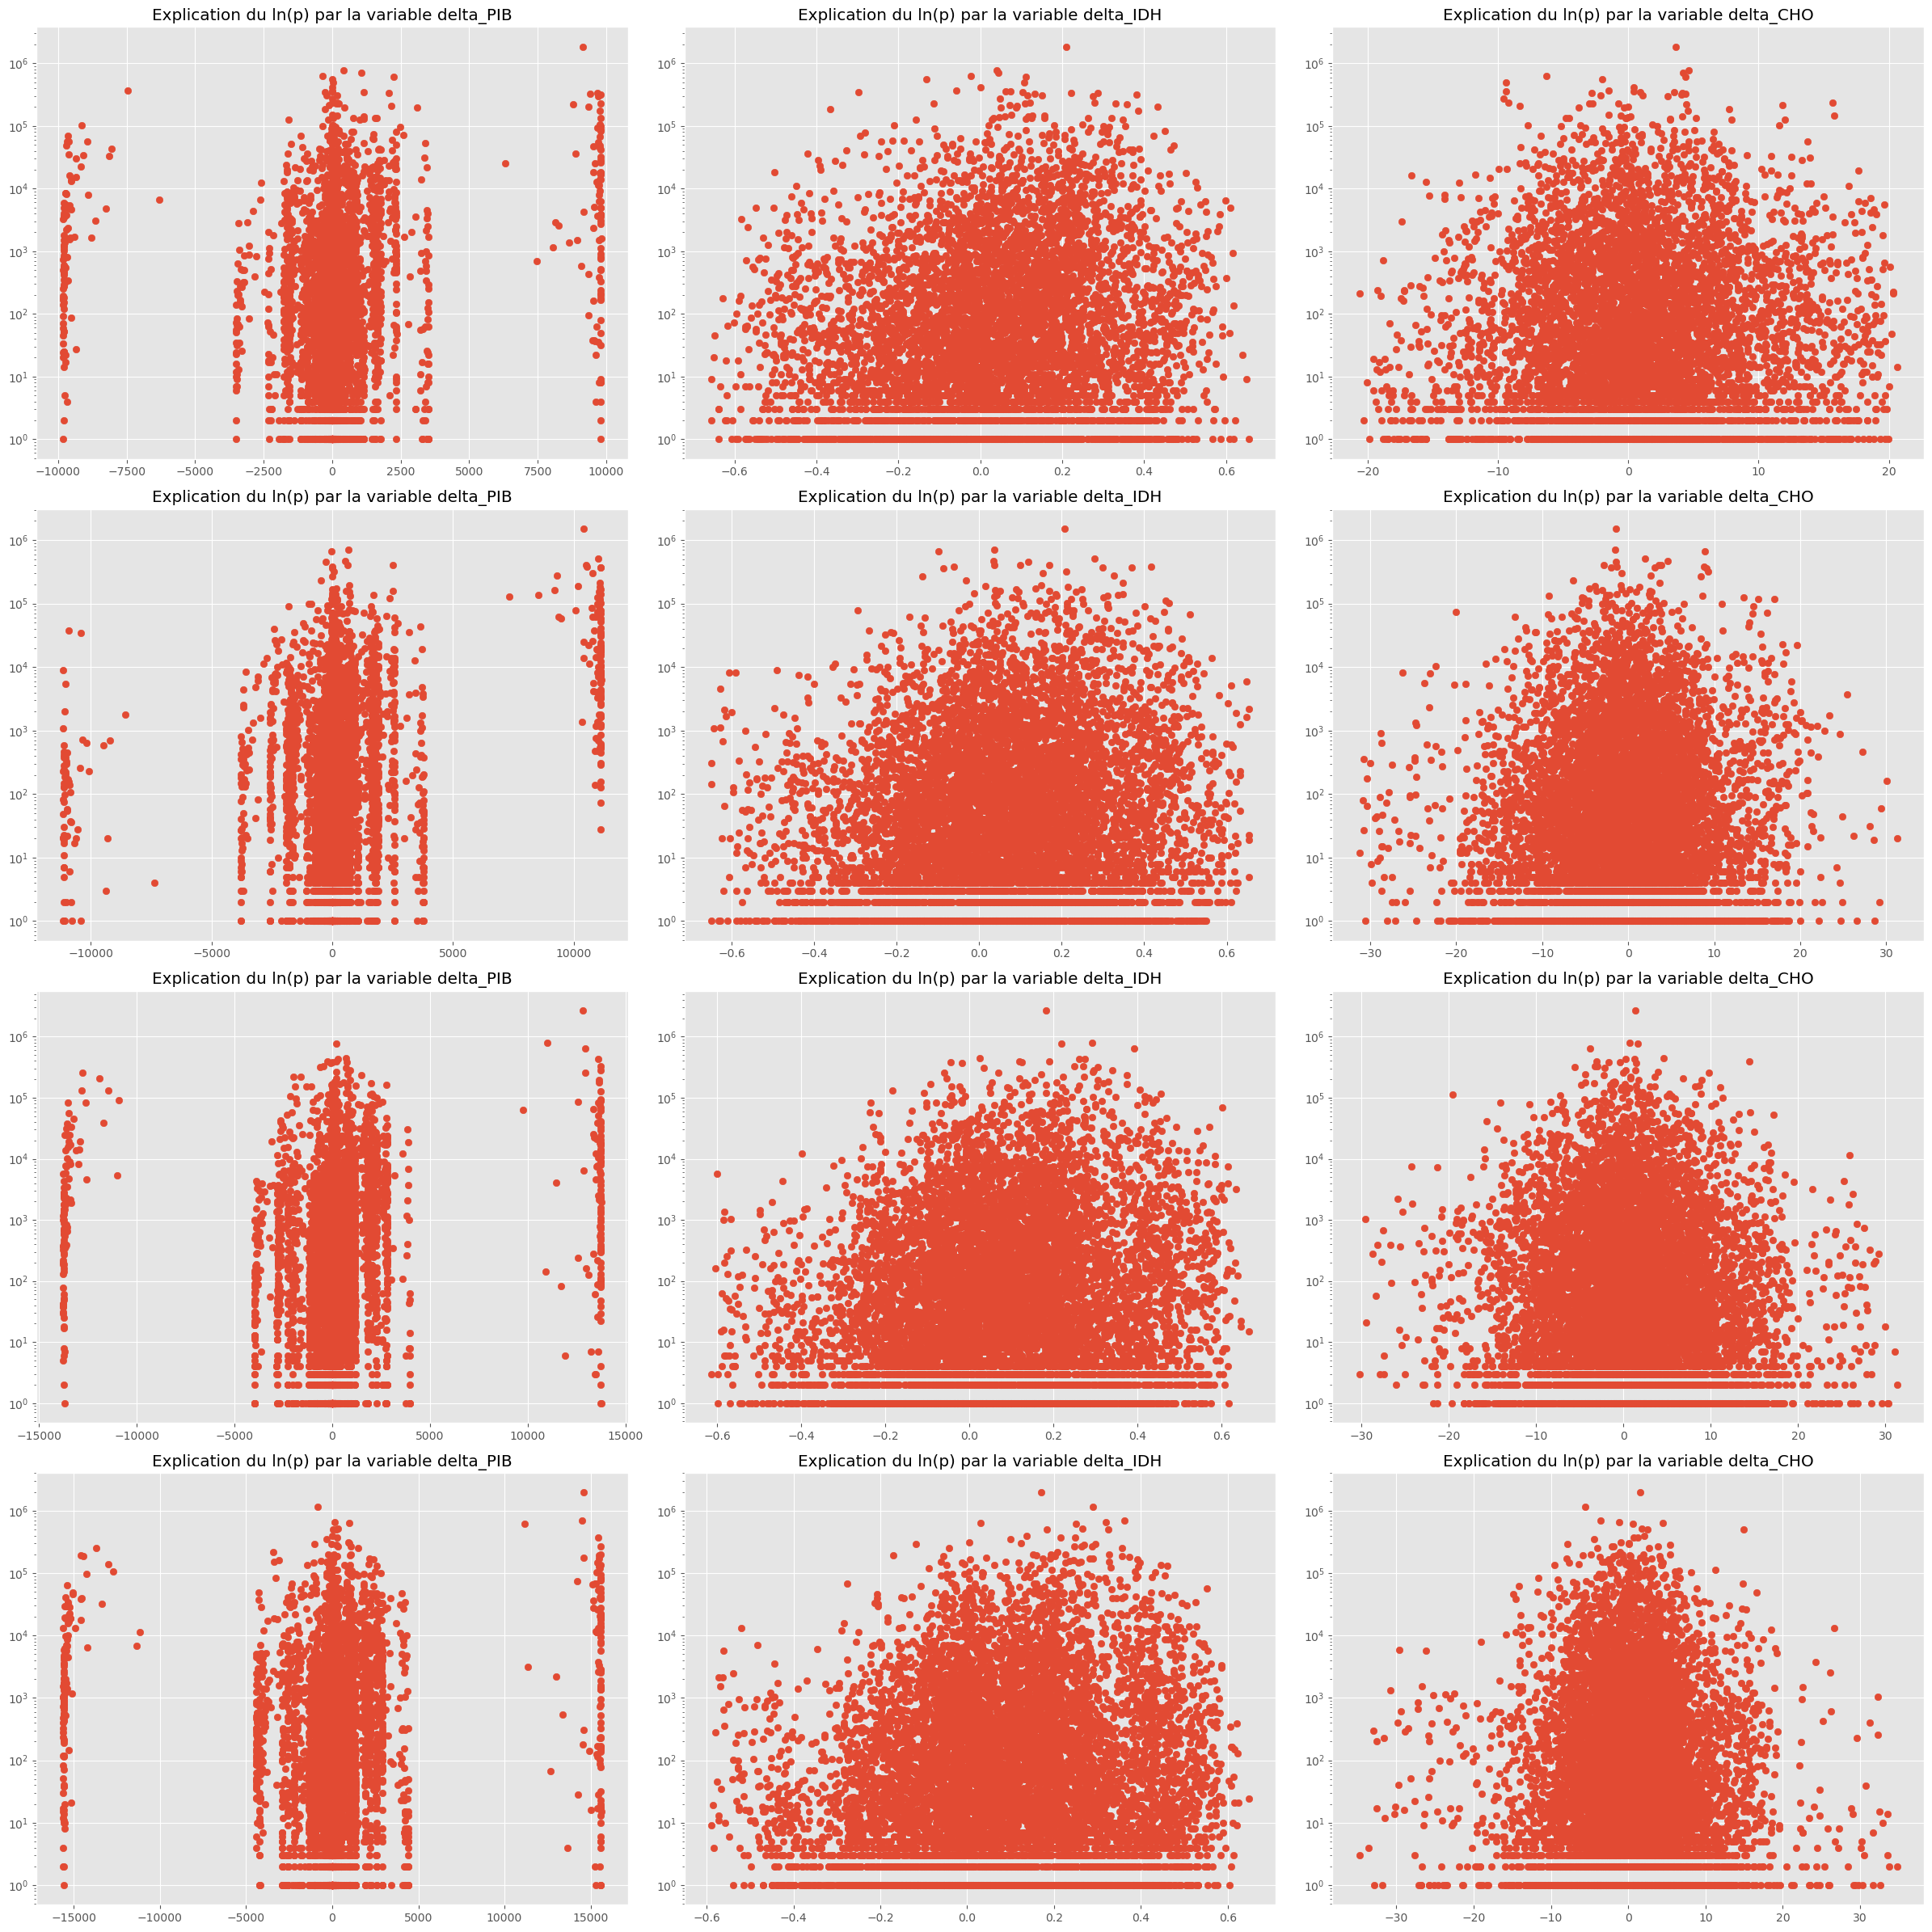

In [16]:
fig, axs = plt.subplots(ncols=3, nrows=4, figsize=(24, 24),
                        layout="constrained")
for row, df in enumerate([df_90, df_95, df_00, df_05]):
    for col, column in enumerate(['delta_PIB', 'delta_IDH', 'delta_CHO']):
        ax = axs[row, col]
        ax.scatter(df[column], df['move'])  
        ax.set_yscale('log')
        #ax.xaxis(f'{column}')
        #ax.yaxis('ln_move')
        ax.set_title(f'Explication du ln(p) par la variable {column}')

plt.tight_layout()  
plt.show()

In [17]:
for res in [results90, results95, results00, results05]:
    print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     56.53
Date:                Thu, 02 May 2024   Prob (F-statistic):           4.85e-36
Time:                        12:10:33   Log-Likelihood:                -15139.
No. Observations:                6125   AIC:                         3.029e+04
Df Residuals:                    6121   BIC:                         3.031e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0441      0.037    109.144      0.0

In [18]:
X90, Y90 = df_90[['PIB_depart', 'PIB_arrivee', 'continent_idem']].values , df_90[['ln_move']].values
X95, Y95 = df_95[['PIB_depart', 'PIB_arrivee', 'continent_idem']].values , df_95[['ln_move']].values
X00, Y00 = df_00[['PIB_depart', 'PIB_arrivee', 'continent_idem']].values , df_00[['ln_move']].values
X05, Y05 = df_05[['PIB_depart', 'PIB_arrivee','continent_idem']].values , df_05[['ln_move']].values
X90 = sm.add_constant(X90)
X95 = sm.add_constant(X95)
X00 = sm.add_constant(X00)
X05 = sm.add_constant(X05)


model90 = sm.OLS(Y90, X90)
model95 = sm.OLS(Y95, X95)
model00 = sm.OLS(Y00, X00)
model05 = sm.OLS(Y05, X05)

results90 = model90.fit()
results95 = model95.fit()
results00 = model00.fit()
results05 = model05.fit()

for res in [results90, results95, results00, results05]:
    print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     348.4
Date:                Thu, 02 May 2024   Prob (F-statistic):          6.88e-209
Time:                        12:10:36   Log-Likelihood:                -14740.
No. Observations:                6125   AIC:                         2.949e+04
Df Residuals:                    6121   BIC:                         2.952e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3985      0.041     83.281      0.0

In [64]:
#On ne prend que les moves > 100 

df_90_filtred = create_df(pays_90, '90', filtre=100)
df_95_filtred = create_df(pays_95, '95', filtre=100)
df_00_filtred = create_df(pays_00, '00', filtre=100)
df_05_filtred = create_df(pays_05, '05', filtre=100)

100%|██████████| 196/196 [00:05<00:00, 35.55it/s]


In [65]:
X90, Y90 = df_90[['PIB_depart', 'PIB_arrivee', 'continent_idem']].values , df_90[['ln_move']].values
X95, Y95 = df_95[['PIB_depart', 'PIB_arrivee', 'continent_idem']].values , df_95[['ln_move']].values
X00, Y00 = df_00[['PIB_depart', 'PIB_arrivee', 'continent_idem']].values , df_00[['ln_move']].values
X05, Y05 = df_05[['PIB_depart', 'PIB_arrivee','continent_idem']].values , df_05[['ln_move']].values
X90 = sm.add_constant(X90)
X95 = sm.add_constant(X95)
X00 = sm.add_constant(X00)
X05 = sm.add_constant(X05)


model90 = sm.OLS(Y90, X90)
model95 = sm.OLS(Y95, X95)
model00 = sm.OLS(Y00, X00)
model05 = sm.OLS(Y05, X05)

results90 = model90.fit()
results95 = model95.fit()
results00 = model00.fit()
results05 = model05.fit()

for res in [results90, results95, results00, results05]:
    print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     348.4
Date:                Mon, 08 Apr 2024   Prob (F-statistic):          6.88e-209
Time:                        14:44:43   Log-Likelihood:                -14740.
No. Observations:                6125   AIC:                         2.949e+04
Df Residuals:                    6121   BIC:                         2.952e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3985      0.041     83.281      0.0

In [27]:
def create_df_probit(df_entree, period):
    #donne les variables X_i et Y_i dans un dico pour les regressions
    if period=='90':
        PIB_temp=PIB_90.copy()
        IDH_temp=IDH_90.copy()
        CHO_temp=CHO_90.copy()
        PIB_sum = PIB_temp['PIB'].astype('float').sum()
    if period=='95':
        PIB_temp=PIB_95.copy()
        IDH_temp=IDH_95.copy()
        CHO_temp=CHO_95.copy()
        PIB_sum = PIB_temp['PIB'].astype('float').sum()
    if period=='00':
        PIB_temp=PIB_00.copy()
        IDH_temp=IDH_00.copy()
        CHO_temp=CHO_00.copy()
        PIB_sum = PIB_temp['PIB'].astype('float').sum()
    if period=='05':
        PIB_temp=PIB_05.copy()
        IDH_temp=IDH_05.copy()
        CHO_temp=CHO_05.copy()
        PIB_sum = PIB_temp['PIB'].astype('float').sum()
    codes = list(df_entree.columns[1:])
    n = len(codes)
    dico_entre = {'move': [], 'pays_depart' : [], 'pays_arrivee' : [], 'PIB_depart' : [], 
                  'PIB_arrivee' : [], 'delta_PIB' : [], 'delta_IDH' : [], 'delta_CHO' : [], 'continent_idem' : []}
    for i in tqdm(range(n-1)):  #nb de pays
        pays_depart = codes[i]  #ISO-CODE
        for j in range(1,n):
            pays_arrivee = codes[j-1]
            moves = df_entree.iloc[i,j]  #nb de migrants partant du pays de départ pour le pays d'arrivée 
            indic = 0
            dep = rc[rc['iso']==pays_depart]['world region'].item()
            arr = rc[rc['iso']==pays_arrivee]['world region'].item()
            if dep == arr: indic=1
            PIB_depart = PIB_temp[PIB_temp['code']==pays_depart]['PIB'].unique()
            PIB_arrivee = PIB_temp[PIB_temp['code']==pays_arrivee]['PIB'].unique()
            IDH_depart = IDH_temp[IDH_temp['code']==pays_depart]['IDH'].unique()
            IDH_arrivee = IDH_temp[IDH_temp['code']==pays_arrivee]['IDH'].unique()
            CHO_depart = CHO_temp[CHO_temp['code']==pays_depart]['CHO'].unique()
            CHO_arrivee = CHO_temp[CHO_temp['code']==pays_arrivee]['CHO'].unique()
            #On fait la régression si on dispose des données
            if len(PIB_depart)!=0 and len(PIB_arrivee)!=0 and len(IDH_depart)!=0 and len(IDH_arrivee)!=0 and len(CHO_depart)!=0 and len(CHO_arrivee)!=0:
                dico_entre['move'].append(min(moves, 1))
                dico_entre['pays_depart'].append(pays_depart)
                dico_entre['pays_arrivee'].append(pays_arrivee)
                dico_entre['PIB_depart'].append(float(PIB_depart[0])/PIB_sum)  #on normalise le PIB
                dico_entre['PIB_arrivee'].append(float(PIB_arrivee[0])/PIB_sum)
                dico_entre['delta_PIB'].append((float(PIB_arrivee[0]) - float(PIB_depart[0]))*10**(-9)) #diff en milliards de dollars
                dico_entre['delta_IDH'].append(float(IDH_arrivee[0]) - float(IDH_depart[0]))
                dico_entre['delta_CHO'].append(float(CHO_arrivee[0]) - float(CHO_depart[0]))
                dico_entre['continent_idem'].append(indic)  #indicatrice que les pays sont sur le même continent
    return pd.DataFrame(dico_entre)

In [28]:
dfP_90 = create_df_probit(pays_90, '90')
dfP_95 = create_df_probit(pays_95, '95')
dfP_00 = create_df_probit(pays_00, '00')
dfP_05 = create_df_probit(pays_05, '05')

100%|██████████| 196/196 [01:35<00:00,  2.06it/s]


In [34]:
XP90, YP90 = dfP_90[['delta_IDH' ,'continent_idem']].values , dfP_90[['move']].values
XP95, YP95 = dfP_95[['delta_IDH' ,'continent_idem']].values , dfP_95[['move']].values
XP00, YP00 = dfP_00[['delta_IDH' ,'continent_idem']].values , dfP_00[['move']].values
XP05, YP05 = dfP_05[['delta_IDH' ,'continent_idem']].values , dfP_05[['move']].values

modelP90 = sm.Probit(YP90, XP90)
modelP95 = sm.Probit(YP95, XP95)
modelP00 = sm.Probit(YP00, XP00)
modelP05 = sm.Probit(YP05, XP05)

resultsP90 = modelP90.fit()
resultsP95 = modelP95.fit()
resultsP00 = modelP00.fit()
resultsP05 = modelP05.fit()

for res in [resultsP90, resultsP95, resultsP00, resultsP05]:
    print(res.summary())

Optimization terminated successfully.
         Current function value: 0.687496
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.666780
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.659505
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.653692
         Iterations 4
                          Probit Regression Results                           
Dep. Variable:                      y   No. Observations:                14400
Model:                         Probit   Df Residuals:                    14398
Method:                           MLE   Df Model:                            1
Date:                Thu, 02 May 2024   Pseudo R-squ.:               -0.008118
Time:                        12:35:06   Log-Likelihood:                -9899.9
converged:                       True   LL-Null:                       -9820.2
Covariance Type:            nonrobust  